In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dir_path = '/content/drive/My Drive/2DayProject'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Global Temperatures Data

In [4]:
temp_df = pd.read_csv(dir_path + '/data/GlobalTemperatures.csv')
temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
temp_df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [6]:
temp_df.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [158]:
temp_df.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062,2015


In [7]:
def fetch_year(date):
    return date.split('-')[0]

temp_df['year'] = temp_df['dt'].apply(fetch_year)
temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [8]:
temp_df2 = temp_df.groupby(by=temp_df.year).agg({'LandAverageTemperature':'mean', 'LandAverageTemperatureUncertainty':'mean'}).reset_index()
temp_df2

,year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [9]:
temp_df2['Uncertainty_top'] = temp_df2['LandAverageTemperature'] + temp_df2['LandAverageTemperatureUncertainty']
temp_df2['Uncertainty_bot'] = temp_df2['LandAverageTemperature'] - temp_df2['LandAverageTemperatureUncertainty']


In [10]:
temp_df2.to_csv(dir_path + '/data/temperature_processed.csv', index=False)
pd.read_csv(dir_path + '/data/temperature_processed.csv')

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_top,Uncertainty_bot
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083
...,...,...,...,...,...
261,2011,9.516000,0.082000,9.598000,9.434000
262,2012,9.507333,0.083417,9.590750,9.423917
263,2013,9.606500,0.097667,9.704167,9.508833
264,2014,9.570667,0.090167,9.660833,9.480500


In [11]:
temp_df2.columns

Index(['year', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bot'],
      dtype='object')

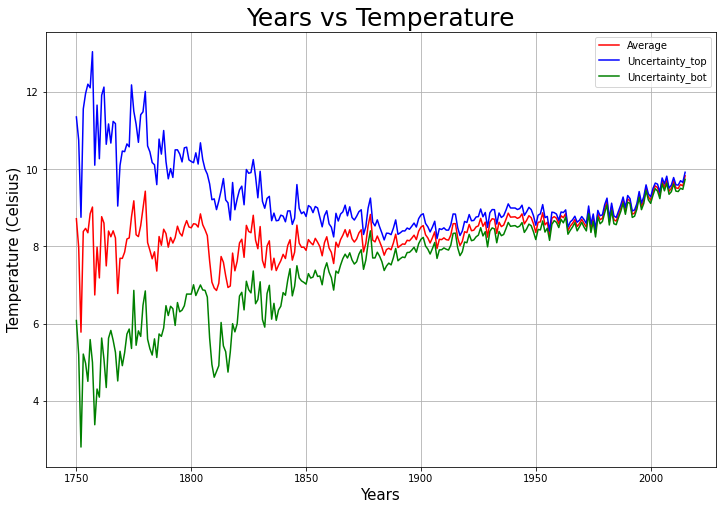

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(temp_df2.year.astype(int), temp_df2.LandAverageTemperature, 'red', label='Average')
plt.plot(temp_df2.year.astype(int), temp_df2.Uncertainty_top, 'blue', label='Uncertainty_top')
plt.plot(temp_df2.year.astype(int), temp_df2.Uncertainty_bot, 'green', label='Uncertainty_bot')
plt.title('Years vs Temperature', fontsize=25)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Temperature (Celsius)', fontsize=15)
plt.legend()
plt.grid()
plt.show()

## Global Average CO2 Data

In [13]:
with open(dir_path + '/data/global_average_co2.csv') as f:
    co2_data = f.readlines()

co2_data

['# --------------------------------------------------------------------\n',
 '# USE OF NOAA GML DATA\n',
 '#\n',
 '# These data are made freely available to the public and the\n',
 '# scientific community in the belief that their wide dissemination\n',
 '# will lead to greater understanding and new scientific insights.\n',
 '# The availability of these data does not constitute publication\n',
 '# of the data.  NOAA relies on the ethics and integrity of the user to\n',
 '# ensure that GML receives fair credit for their work.  If the data\n',
 '# are obtained for potential use in a publication or presentation,\n',
 '# GML should be informed at the outset of the nature of this work.\n',
 '# If the GML data are essential to the work, or if an important\n',
 '# result or conclusion depends on the GML data, co-authorship\n',
 '# may be appropriate.  This should be discussed at an early stage in\n',
 '# the work.  Manuscripts using the GML data should be sent to GML\n',
 '# for review before

In [14]:
for i in range(len(co2_data)):
    if co2_data[i] == '1980,1,1980.042,338.55,337.93\n':
        print(i)
        break

57


In [15]:
co2_data[56:]

['year,month,decimal,average,trend\n',
 '1980,1,1980.042,338.55,337.93\n',
 '1980,2,1980.125,339.27,338.22\n',
 '1980,3,1980.208,339.60,338.25\n',
 '1980,4,1980.292,340.00,338.37\n',
 '1980,5,1980.375,340.43,338.90\n',
 '1980,6,1980.458,339.99,339.20\n',
 '1980,7,1980.542,338.44,339.30\n',
 '1980,8,1980.625,337.21,339.49\n',
 '1980,9,1980.708,337.05,339.45\n',
 '1980,10,1980.792,337.82,339.17\n',
 '1980,11,1980.875,338.93,339.26\n',
 '1980,12,1980.958,339.64,339.40\n',
 '1981,1,1981.042,340.18,339.55\n',
 '1981,2,1981.125,340.74,339.70\n',
 '1981,3,1981.208,341.38,340.02\n',
 '1981,4,1981.292,341.68,340.06\n',
 '1981,5,1981.375,341.43,339.89\n',
 '1981,6,1981.458,340.62,339.84\n',
 '1981,7,1981.542,339.22,340.07\n',
 '1981,8,1981.625,338.06,340.35\n',
 '1981,9,1981.708,337.97,340.36\n',
 '1981,10,1981.792,339.07,340.41\n',
 '1981,11,1981.875,340.17,340.50\n',
 '1981,12,1981.958,340.74,340.51\n',
 '1982,1,1982.042,341.37,340.76\n',
 '1982,2,1982.125,341.95,340.89\n',
 '1982,3,1982.208,3

In [16]:
co2_data = co2_data[56:]
co2_data = ''.join(co2_data)

with open(dir_path + '/data/global_average_co2_processed.csv', 'w') as f:
    f.write(co2_data)

co2_df = pd.read_csv(dir_path + '/data/global_average_co2_processed.csv')
co2_df.head()

,year,month,decimal,average,trend
0,1980,1,1980.042,338.55,337.93
1,1980,2,1980.125,339.27,338.22
2,1980,3,1980.208,339.60,338.25
3,1980,4,1980.292,340.00,338.37
4,1980,5,1980.375,340.43,338.90


In [509]:
co2_df

,year,month,decimal,average,trend
0,1980,1,1980.042,338.55,337.93
1,1980,2,1980.125,339.27,338.22
2,1980,3,1980.208,339.60,338.25
3,1980,4,1980.292,340.00,338.37
4,1980,5,1980.375,340.43,338.90
...,...,...,...,...,...
493,2021,2,2021.125,415.30,413.93
494,2021,3,2021.208,415.63,414.00
495,2021,4,2021.292,415.93,414.14
496,2021,5,2021.375,416.22,414.59


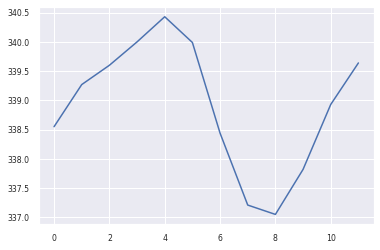

In [511]:
co2_df[:14]
plt.plot(co2_df[:12].average)

In [159]:
co2_df.tail()

,year,month,decimal,average,trend
493,2021,2,2021.125,415.30,413.93
494,2021,3,2021.208,415.63,414.00
495,2021,4,2021.292,415.93,414.14
496,2021,5,2021.375,416.22,414.59
497,2021,6,2021.458,415.48,414.86


In [17]:
co2_df2 = co2_df.groupby(by='year').mean()
co2_df2.head()

,month,decimal,average,trend
year,,,,
1980,6.5,1980.5,338.910833,338.911667
1981,6.5,1981.5,340.105000,340.105000
1982,6.5,1982.5,340.856667,340.855833
1983,6.5,1983.5,342.530833,342.531667
1984,6.5,1984.5,344.075833,344.075000


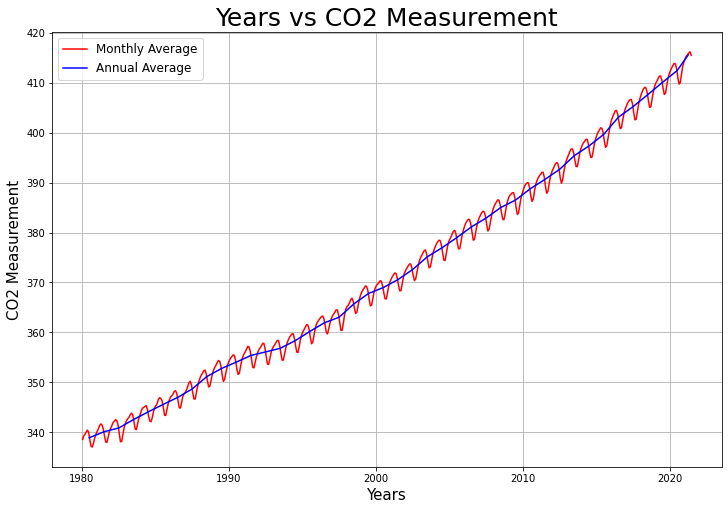

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(co2_df.decimal, co2_df.average, 'r', label='Monthly Average')
plt.plot(co2_df2.decimal, co2_df2.average, 'b', label='Annual Average')
plt.title('Years vs CO2 Measurement', fontsize=25)
plt.xlabel('Years', fontsize=15)
plt.ylabel('CO2 Measurement', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

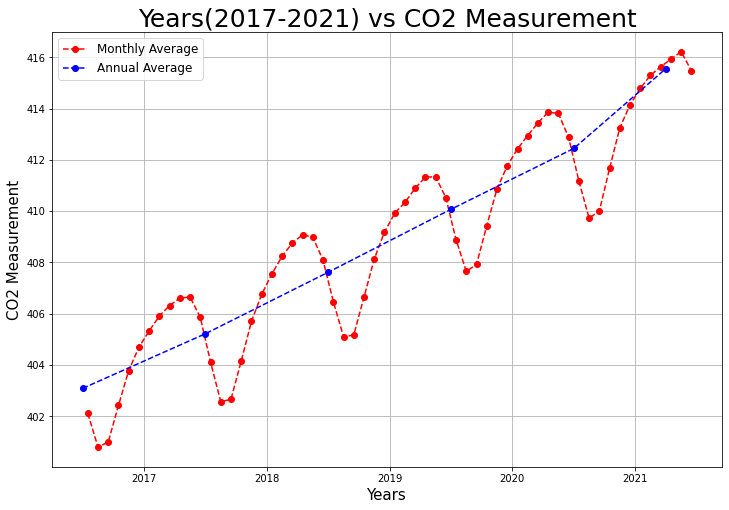

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(co2_df.decimal[-60:], co2_df.average[-60:], 'ro--', label='Monthly Average')
plt.plot(co2_df2.decimal[-6:], co2_df2.average[-6:], 'bo--', label='Annual Average')
plt.title('Years(2017-2021) vs CO2 Measurement', fontsize=25)
plt.xlabel('Years', fontsize=15)
plt.ylabel('CO2 Measurement', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

## CO2 Emission Data

In [20]:
co2_emission_df = pd.read_csv(dir_path + '/data/co2_emission.csv')
co2_emission_df.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,0.0,0.015,0.0,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,0.0,0.099,0.0,0.009,NaN,NaN,0.021,NaN,NaN,NaN,0.063,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.036,NaN,NaN,0.063,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,0.0,0.191,0.0,0.010,NaN,NaN,0.026,NaN,NaN,NaN,0.066,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.061,NaN,NaN,0.129,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,0.0,0.282,0.0,0.009,NaN,NaN,0.032,NaN,NaN,NaN,0.060,NaN,NaN,0.004,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.093,NaN,NaN,0.189,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,0.0,0.388,0.0,0.010,NaN,NaN,0.038,NaN,NaN,NaN,0.068,NaN,NaN,0.005,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.131,NaN,NaN,0.257,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [21]:
co2_emission_df.columns

Index(['iso_code', 'country', 'year', 'co2', 'consumption_co2',
       'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'trade_co2_share',
       'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'cumulative_cement_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2',
       'cumulative_other_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

In [22]:
co2_emission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24651 entries, 0 to 24650
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21489 non-null  object 
 1   country                              24651 non-null  object 
 2   year                                 24651 non-null  int64  
 3   co2                                  23403 non-null  float64
 4   consumption_co2                      3815 non-null   float64
 5   co2_growth_prct                      24383 non-null  float64
 6   co2_growth_abs                       23042 non-null  float64
 7   trade_co2                            3815 non-null   float64
 8   co2_per_capita                       22735 non-null  float64
 9   consumption_co2_per_capita           3815 non-null   float64
 10  share_global_co2                     23403 non-null  float64
 11  cumulative_co2              

In [23]:
co2_emission_country_df = co2_emission_df.groupby(by=['country']).mean().sort_values(by='co2', ascending=False)
co2_emission_country_df

,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
World,1884.5,6121.927356,22366.556967,3.257100,135.435126,-0.014164,1.783638,4.151525,100.000000,225432.138796,100.000000,0.471000,0.475778,0.240418,2859.947856,346.668617,244.013986,1722.793761,3519.656630,118.812433,0.063667,0.986312,0.049129,0.319870,0.729909,0.018467,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,7868.370767,133739.830715,7099.324157,41363.325609,106372.693164,1871.089933,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,41453.292963,6.471000,7738.284444,1.216481,2710.887407,0.425593,2.597529e+09,3.865245e+13,100006.078255,17812.870655,2.118327
Asia,1924.5,3020.940423,11636.788345,14.928519,123.423780,-905.039103,0.909744,2.899034,13.762143,63294.253619,7.322083,0.328391,0.397517,0.277491,1603.193637,270.968685,96.305692,524.951192,949.428069,16.365500,0.072620,0.495577,0.033169,0.137894,0.289219,0.004200,-6.455862,36.688804,17.192262,34.907231,11.211635,14.281750,13.800000,4304.692424,34199.848720,2941.062969,7979.365596,21647.651769,242.198233,23.901196,7.336845,33.320000,6.393846,10.769125,12.625333,NaN,NaN,NaN,NaN,NaN,NaN,1.692059e+09,NaN,NaN,NaN,NaN
North America,1902.0,2000.926749,6954.796000,34.200256,27.697342,217.439931,7.618441,13.897207,23.811745,87396.447970,21.399574,0.688342,0.428345,0.219182,788.499443,34.329967,48.124771,634.399500,1181.105425,30.287633,0.101717,4.000505,0.122143,1.662210,3.399975,0.060333,3.104483,37.345333,20.272638,24.321286,72.184638,51.721562,25.627667,1264.038017,45555.142821,1440.688029,19771.260609,42737.274531,460.152533,47.562000,19.194979,28.886143,80.132754,56.008313,23.576333,NaN,NaN,NaN,NaN,NaN,NaN,1.845276e+08,NaN,26984.233673,92939.238036,NaN
Europe,1884.5,1944.913589,6438.619621,2.599480,20.220654,132.471241,4.039791,8.795069,67.758741,95445.546122,74.983185,0.745055,0.371069,0.259291,1045.576878,79.985420,41.505862,678.406229,905.270242,67.871667,0.117348,2.459123,0.057414,0.946085,1.314224,0.092867,2.361379,30.295357,69.815111,14.421552,19.332288,28.851212,56.928000,2827.959938,68492.304200,888.805879,15906.291475,30298.037067,1106.757267,31.081429,77.599556,7.985172,15.413983,30.085152,60.764333,NaN,NaN,NaN,NaN,NaN,NaN,4.487451e+08,NaN,21682.801636,30420.115727,NaN
United States,1909.5,1864.719400,5846.866310,4.957991,24.129900,220.494552,9.808859,20.133414,23.474091,84428.658155,21.382818,0.707231,0.440310,0.223945,791.220450,23.732417,30.890414,540.245399,973.627144,27.511233,0.114250,5.076350,0.128000,2.287674,4.374644,0.094200,3.813793,34.904833,20.591545,16.732000,68.993768,46.639000,23.285667,1000.634292,46016.232064,951.488743,17698.211514,36308.007713,413.966100,45.450250,19.583955,22.138143,77.540290,51.113438,21.122000,6138.317407,21.357037,708.982963,2.482889,261.998889,0.914037,1.177178e+08,3.411883e+12,22695.324236,87007.069927,2.540288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [512]:
co2_emission_country_df = co2_emission_df.groupby(by=['country']).sum().sort_values(by='co2', ascending=False)
co2_emission_country_df

,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
World,508815,1652920.386,1364359.975,876.16,36432.049,-0.864,394.184,253.243,27000.00,6.086668e+07,27000.00,7.536,4.282,13.223,772185.921,41600.234,17080.979,237745.539,580743.344,3564.373,7.640,217.975,3.439,44.142,120.435,0.554,0.00,12000.00,27000.00,7000.00,13800.00,16500.00,3000.00,944204.492,3.610975e+07,496952.691,5708138.934,1.755149e+07,56132.698,12000.00,27000.00,7000.00,13800.00,16500.00,3000.00,1119238.91,174.717,208933.68,32.845,73193.96,11.491,5.740540e+11,6.184393e+14,5500334.304,979707.886,110.153
Europe,508815,525126.669,186719.969,699.26,5439.356,3841.666,888.754,255.057,18294.86,2.577030e+07,20245.46,148.266,10.761,14.261,282305.757,8958.367,2407.340,80051.935,149369.590,2036.150,13.143,541.007,3.330,111.638,216.847,2.786,68.48,3393.08,18850.08,836.45,2281.21,4760.45,1707.84,316731.513,1.849292e+07,51550.741,1876942.394,4.999176e+06,33202.718,3481.12,20951.88,463.14,1818.85,4964.05,1822.93,0.00,0.000,0.00,0.000,0.00,0.000,1.009677e+11,0.000000e+00,1192554.090,1673106.365,0.000
Asia,365655,507517.991,337466.862,2821.49,20241.500,-26246.134,152.837,84.072,2312.04,1.063343e+07,1230.11,45.318,11.528,15.262,269336.531,24929.119,6259.870,54594.924,151908.491,490.965,6.681,83.257,2.156,14.341,46.275,0.126,-187.22,3375.37,2888.30,2268.97,1166.01,2285.08,414.00,396031.703,5.745575e+06,191169.093,829854.022,3.463624e+06,7265.947,2198.91,1232.59,2165.80,664.96,1723.06,378.76,0.00,0.000,0.00,0.000,0.00,0.000,3.214912e+11,0.000000e+00,0.000,0.000,0.000
North America,446970,470217.786,201689.084,8002.86,6481.178,6305.758,1676.057,403.019,5595.76,2.053817e+07,5028.90,136.980,12.422,12.055,185297.369,4119.596,3368.734,87547.131,188976.868,908.629,12.206,880.111,8.550,229.385,543.996,1.810,90.03,4481.44,4764.07,1702.49,9961.48,8275.45,768.83,151684.562,1.070546e+07,100848.162,2728433.964,6.837964e+06,13804.576,5707.44,4510.82,2022.03,11058.32,8961.33,707.29,0.00,0.000,0.00,0.000,0.00,0.000,4.078060e+10,0.000000e+00,1484132.852,5111658.092,0.000
United States,420090,410238.268,169559.123,1085.80,5284.448,6394.342,2157.949,583.869,5164.30,1.857430e+07,4704.22,140.739,12.769,12.317,174068.499,2847.890,2162.329,74553.865,155780.343,825.337,13.710,1116.797,8.960,315.699,699.943,2.826,110.60,4188.58,4530.14,1171.24,9521.14,7462.24,698.57,120076.115,1.012357e+07,66604.212,2442353.189,5.809281e+06,12418.983,5454.03,4308.47,1549.67,10700.56,8178.15,633.66,165734.57,576.640,19142.54,67.038,7073.97,24.679,2.589792e+10,6.789647e+14,1248242.833,4785388.846,132.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,60135,0.271,0.000,94.32,0.005,0.000,27.328,0.000,0.00,3.917000e+00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.271,0.000,0.000,0.000,0.000,

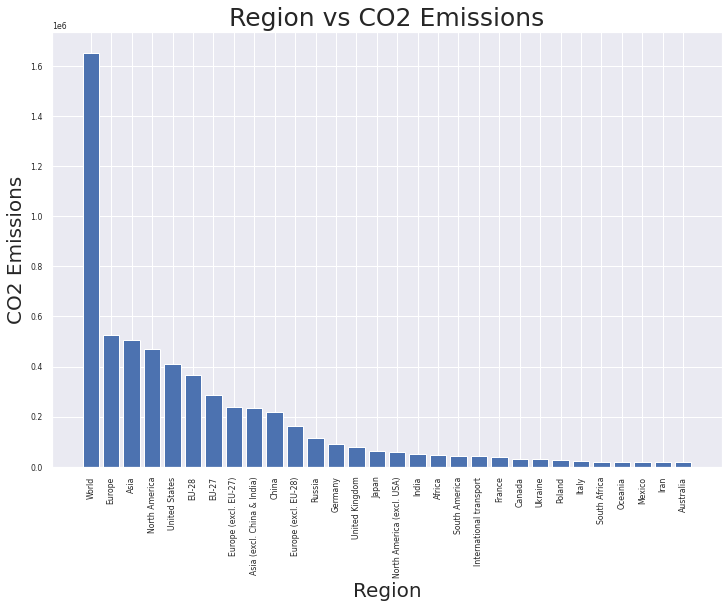

In [513]:
co2_emission_country_df.dropna(subset=['co2'], inplace=True)
co2_emission_country_df.reset_index(inplace=True)
plt.figure(figsize=(12, 8))
plt.title('Region vs CO2 Emissions', fontsize=25)
plt.xlabel('Region', fontsize=20)
plt.ylabel('CO2 Emissions', fontsize=20)
plt.xticks(rotation=90)
plt.bar(co2_emission_country_df.country[:30], co2_emission_country_df.co2[:30])
plt.show()


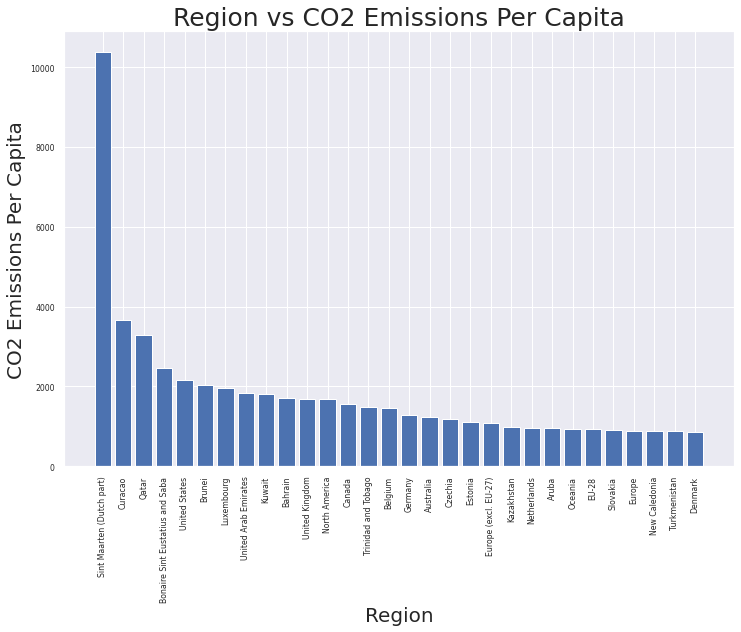

In [515]:
co2_emission_country_df2 = co2_emission_df.groupby(by=['country']).sum().sort_values(by='co2_per_capita', ascending=False)
co2_emission_country_df2.dropna(subset=['co2_per_capita'], inplace=True)
co2_emission_country_df2.reset_index(inplace=True)
plt.figure(figsize=(12, 8))
plt.title('Region vs CO2 Emissions Per Capita', fontsize=25)
plt.xlabel('Region', fontsize=20)
plt.ylabel('CO2 Emissions Per Capita', fontsize=20)
plt.xticks(rotation=90)
plt.bar(co2_emission_country_df2.country[:30], co2_emission_country_df2.co2_per_capita[:30])
plt.show()

In [24]:
co2_emission_country_df.dropna(subset=['co2'], inplace=True)
co2_emission_country_df.reset_index(inplace=True)
co2_emission_country_df

,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,World,1884.5,6121.927356,22366.556967,3.257100,135.435126,-0.014164,1.783638,4.151525,100.000000,225432.138796,100.000000,0.471000,0.475778,0.240418,2859.947856,346.668617,244.013986,1722.793761,3519.656630,118.812433,0.063667,0.986312,0.049129,0.319870,0.729909,0.018467,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,7868.370767,133739.830715,7099.324157,41363.325609,106372.693164,1871.089933,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,41453.292963,6.471000,7738.284444,1.216481,2710.887407,0.425593,2.597529e+09,3.865245e+13,100006.078255,17812.870655,2.118327
1,Asia,1924.5,3020.940423,11636.788345,14.928519,123.423780,-905.039103,0.909744,2.899034,13.762143,63294.253619,7.322083,0.328391,0.397517,0.277491,1603.193637,270.968685,96.305692,524.951192,949.428069,16.365500,0.072620,0.495577,0.033169,0.137894,0.289219,0.004200,-6.455862,36.688804,17.192262,34.907231,11.211635,14.281750,13.800000,4304.692424,34199.848720,2941.062969,7979.365596,21647.651769,242.198233,23.901196,7.336845,33.320000,6.393846,10.769125,12.625333,NaN,NaN,NaN,NaN,NaN,NaN,1.692059e+09,NaN,NaN,NaN,NaN
2,North America,1902.0,2000.926749,6954.796000,34.200256,27.697342,217.439931,7.618441,13.897207,23.811745,87396.447970,21.399574,0.688342,0.428345,0.219182,788.499443,34.329967,48.124771,634.399500,1181.105425,30.287633,0.101717,4.000505,0.122143,1.662210,3.399975,0.060333,3.104483,37.345333,20.272638,24.321286,72.184638,51.721562,25.627667,1264.038017,45555.142821,1440.688029,19771.260609,42737.274531,460.152533,47.562000,19.194979,28.886143,80.132754,56.008313,23.576333,NaN,NaN,NaN,NaN,NaN,NaN,1.845276e+08,NaN,26984.233673,92939.238036,NaN
3,Europe,1884.5,1944.913589,6438.619621,2.599480,20.220654,132.471241,4.039791,8.795069,67.758741,95445.546122,74.983185,0.745055,0.371069,0.259291,1045.576878,79.985420,41.505862,678.406229,905.270242,67.871667,0.117348,2.459123,0.057414,0.946085,1.314224,0.092867,2.361379,30.295357,69.815111,14.421552,19.332288,28.851212,56.928000,2827.959938,68492.304200,888.805879,15906.291475,30298.037067,1106.757267,31.081429,77.599556,7.985172,15.413983,30.085152,60.764333,NaN,NaN,NaN,NaN,NaN,NaN,4.487451e+08,NaN,21682.801636,30420.115727,NaN
4,United States,1909.5,1864.719400,5846.866310,4.957991,24.129900,220.494552,9.808859,20.133414,23.474091,84428.658155,21.382818,0.707231,0.440310,0.223945,791.220450,23.732417,30.890414,540.245399,973.627144,27.511233,0.114250,5.076350,0.128000,2.287674,4.374644,0.094200,3.813793,34.904833,20.591545,16.732000,68.993768,46.639000,23.285667,1000.634292,46016.232064,951.488743,17698.211514,36308.007713,413.966100,45.450250,19.583955,22.138143,77.540290,51.113438,21.122000,6138.317407,21.357037,708.982963,2.482889,261.998889,0.914037,1.177178e+08,3.411883e+12,22695.324236,87007.069927,2.540288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

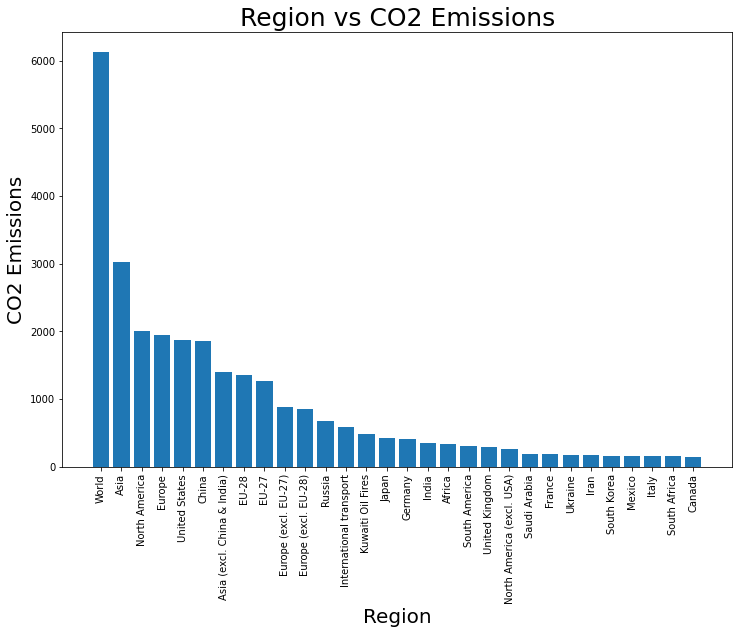

In [25]:
plt.figure(figsize=(12, 8))
plt.title('Region vs CO2 Emissions', fontsize=25)
plt.xlabel('Region', fontsize=20)
plt.ylabel('CO2 Emissions', fontsize=20)
plt.xticks(rotation=90)
plt.bar(co2_emission_country_df.country[:30], co2_emission_country_df.co2[:30])
plt.show()


In [26]:
co2_emission_df

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,0.00,0.015,0.00,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.00,0.070,NaN,0.011,NaN,0.00,0.099,0.00,0.009,NaN,NaN,0.021,NaN,NaN,NaN,0.063,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.036,NaN,NaN,0.063,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.70,0.007,NaN,0.012,NaN,0.00,0.191,0.00,0.010,NaN,NaN,0.026,NaN,NaN,NaN,0.066,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.061,NaN,NaN,0.129,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.00,0.000,NaN,0.012,NaN,0.00,0.282,0.00,0.009,NaN,NaN,0.032,NaN,NaN,NaN,0.060,NaN,NaN,0.004,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.093,NaN,NaN,0.189,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.00,0.015,NaN,0.013,NaN,0.00,0.388,0.00,0.010,NaN,NaN,0.038,NaN,NaN,NaN,0.068,NaN,NaN,0.005,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.131,NaN,NaN,0.257,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24646,ZWE,Zimbabwe,2015,12.170,13.308,1.65,0.198,1.138,0.881,0.963,0.03,726.480,0.05,0.579,0.633,0.219,8.035,0.504,NaN,NaN,3.631,NaN,0.036,0.582,NaN,NaN,0.263,NaN,9.35,0.04,0.05,NaN,NaN,0.03,NaN,17.478,577.422,NaN,NaN,131.580,NaN,0.05,0.08,NaN,NaN,0.02,NaN,67.49,4.885,11.87,0.859,6.68,0.484,13814642.0,2.102746e+10,55.642,4027.628,2.223
24647,ZWE,Zimbabwe,2016,10.815,12.171,-11.14,-1.356,1.356,0.771,0.868,0.03,737.295,0.05,0.516,0.581,0.228,7.061,0.581,NaN,NaN,3.173,NaN,0.041,0.503,NaN,NaN,0.226,NaN,12.54,0.04,0.05,NaN,NaN,0.03,NaN,18.059,584.482,NaN,NaN,134.753,NaN,0.05,0.08,NaN,NaN,0.02,NaN,65.98,4.703,11.92,0.850,6.55,0.467,14030338.0,2.096179e+10,47.500,3385.574,1.889
24648,ZWE,Zimbabwe,2017,10.247,11.774,-5.25,-0.568,1.527,0.720,0.827,0.03,747.542,0.05,0.467,0.536,NaN,6.383,0.581,NaN,NaN,3.283,NaN,0.041,0.448,NaN,NaN,0.231,NaN,14.90,0.04,0.04,NaN,NaN,0.03,NaN,18.640,590.865,NaN,NaN,138.036,NaN,0.05,0.08,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
24649,ZWE,Zimbabwe,2018,11.341,12.815,10.67,1.094,1.475,0.785,0.888,0.03,758.882,0.05,0.499,0.564,NaN,7.369,0.581,NaN,NaN,3.390,NaN,0.040,0.510,NaN,NaN,0.235,NaN,13.01,0.04,0.05,NaN,NaN,0.03,NaN,19.222,598.234,NaN,NaN,141.426,NaN,0.05,0.08,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,

In [27]:
co2_emission_country_df2 = co2_emission_df.groupby(by=['country']).mean().sort_values(by='co2_per_capita', ascending=False)
co2_emission_country_df2.dropna(subset=['co2_per_capita'], inplace=True)
co2_emission_country_df2.reset_index(inplace=True)
co2_emission_country_df2

,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,Sint Maarten (Dutch part),1972.5,0.714677,NaN,15.386237,0.006088,NaN,148.262071,NaN,0.005914,31.711591,0.005054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714677,NaN,NaN,NaN,NaN,NaN,148.262071,NaN,NaN,NaN,NaN,NaN,NaN,0.021290,NaN,NaN,NaN,NaN,NaN,31.711591,NaN,NaN,NaN,NaN,NaN,0.020323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.971874e+04,NaN,NaN,NaN,NaN
1,Curacao,1972.5,6.005065,NaN,15.196452,0.038670,NaN,52.429586,NaN,0.052258,269.306237,0.039355,NaN,NaN,NaN,NaN,NaN,NaN,0.272800,5.990409,NaN,NaN,NaN,NaN,1.684600,52.309229,NaN,NaN,NaN,NaN,NaN,0.000000,0.176344,NaN,NaN,NaN,NaN,0.802200,269.263108,NaN,NaN,NaN,NaN,0.000000,0.174409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.399444e+05,NaN,NaN,NaN,NaN
2,Qatar,1984.0,28.725225,35.272345,50.457000,1.558371,-21.567483,46.172197,33.534966,0.104085,445.159521,0.039155,1.251725,1.068069,0.515636,NaN,0.637078,3.997452,26.800877,4.386746,NaN,0.602647,NaN,24.482476,28.988596,7.984268,NaN,-33.778966,0.061765,NaN,1.573095,0.500175,0.044366,NaN,7.050431,NaN,104.370524,344.343912,77.930648,NaN,0.028431,NaN,1.379286,0.231228,0.020845,NaN,44.207778,39.761333,3.650000,3.382370,0.604444,0.468630,6.372243e+05,6.066096e+10,169.131909,190556.615709,4.290047
3,Bonaire Sint Eustatius and Saba,1972.5,0.319366,NaN,15.377312,0.002758,NaN,35.142900,NaN,0.001398,14.185344,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.319366,NaN,NaN,NaN,NaN,NaN,35.142900,NaN,NaN,NaN,NaN,NaN,NaN,0.009140,NaN,NaN,NaN,NaN,NaN,14.185344,NaN,NaN,NaN,NaN,NaN,0.010323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333334e+04,NaN,NaN,NaN,NaN
4,United Arab Emirates,1989.0,76.534656,149.130862,90.631000,3.177900,21.388138,29.909951,29.585621,0.277705,1255.156984,0.108525,0.769759,0.615704,0.413218,3.657263,3.207023,8.164275,52.607811,20.548082,NaN,0.789750,0.414737,13.957039,12.852679,6.375033,NaN,16.650345,0.349773,0.024737,2.707059,0.979811,0.194590,NaN,44.274250,19.282684,325.545608,708.420566,329.524918,NaN,0.176591,0.002632,3.556471,0.448868,0.079016,NaN,150.894074,32.775000,29.225185,6.229889,4.108519,0.895407,3.039853e+06,1.757766e+11,473.618273,125305.912200,1.913167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Somalia,1984.5,0.462243,NaN,7.006087,0.009116,NaN,0.066700,NaN,0.000000,12.280714,0.000000,NaN,NaN,0.192135,NaN,0.012125,NaN,NaN,0.460829,NaN,0.001500,NaN,NaN,NaN,0.066514,NaN,NaN,0.000000,NaN,NaN,NaN,0.005857,NaN,0.064750,NaN,NaN,NaN,12.239957,NaN,0.000000,NaN,NaN,NaN,0.004714,NaN,41.321481,4.318407,18.376667,1.901852,6.704444,0.698815,6.856948e+06,NaN,3.608676,434.952432,NaN
220,Rwanda,1984.5,0.393029,0.609621,11.030870,0.015884,0.000000,0.053843,0.069207,0.000000,8.407000,0.000000,0.040174,0.055759,0.204514,0.002750,0.042091,0.004000,0.014313,0.369457,NaN,0.004424,0.001250,0.000833,0.001312,0.051329,NaN,0.000000,0.002727,0.000000,0.000000,0.00

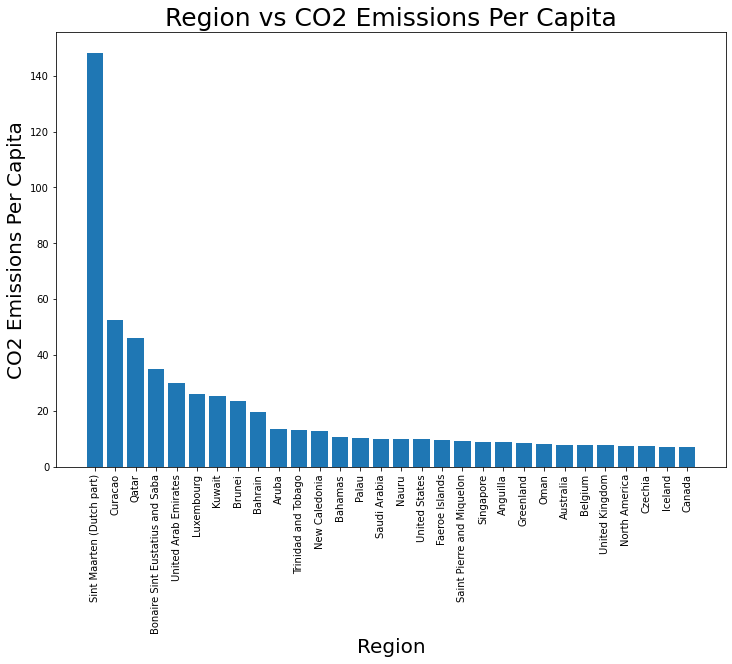

In [28]:
plt.figure(figsize=(12, 8))
plt.title('Region vs CO2 Emissions Per Capita', fontsize=25)
plt.xlabel('Region', fontsize=20)
plt.ylabel('CO2 Emissions Per Capita', fontsize=20)
plt.xticks(rotation=90)
plt.bar(co2_emission_country_df2.country[:30], co2_emission_country_df2.co2_per_capita[:30])
plt.show()


In [29]:
co2_emission_country_df3 = co2_emission_df.groupby(by=['country']).mean().sort_values(by='co2_per_gdp', ascending=False)
co2_emission_country_df3.dropna(subset=['co2_per_gdp'], inplace=True)
co2_emission_country_df3.reset_index(inplace=True)
co2_emission_country_df3

,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,Bahrain,1976.0,10.248770,14.147310,25.990698,0.399407,-7.628276,19.670977,17.011379,0.048736,223.580437,0.025747,2.070261,1.153379,0.162216,0.051667,0.209062,NaN,11.791982,2.444276,NaN,0.193219,0.184667,NaN,16.042386,9.082966,NaN,-29.931034,0.016875,0.000000,NaN,0.247895,0.080575,NaN,2.014094,0.088000,NaN,198.981614,92.393931,NaN,0.006562,0.000000,NaN,0.145439,0.071954,NaN,29.021852,32.901556,8.312963,9.174259,0.058519,0.067519,4.651929e+05,1.202769e+10,113.950973,150113.689649,7.169676
1,Europe (excl. EU-28),1924.0,847.500553,1782.981379,8.797158,11.543505,-478.686655,3.829716,7.402897,5.877316,30314.054284,4.400684,1.796204,0.524931,1.314873,350.429868,26.522591,28.508082,441.015937,299.870463,23.473067,0.116398,1.667663,0.119837,1.859116,1.340988,0.097167,-20.747241,8.163011,5.895947,9.918980,12.609895,11.139375,19.480667,906.204194,15023.411853,625.604490,10635.049326,11049.131013,399.6632,8.129462,3.926789,5.690408,10.183684,11.694313,23.554667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Turkmenistan,1924.5,16.015958,NaN,10.570370,0.522213,NaN,5.256613,NaN,0.094583,468.093536,0.063869,1.562450,NaN,0.252771,0.626510,0.472798,0.312857,15.457305,6.774956,NaN,0.173798,0.387860,0.109571,4.041347,2.662187,NaN,NaN,0.170899,0.014336,0.118095,0.456105,0.386188,NaN,16.050831,21.396140,3.637286,337.150242,247.573169,NaN,0.169663,0.007413,0.055714,0.358947,0.416375,NaN,83.828889,17.709593,33.831481,7.190444,2.999259,0.640926,1.685220e+06,4.397193e+10,200.746314,42925.030171,6.250344
3,Mongolia,1984.5,9.895000,15.316552,9.808261,0.945319,-1.063759,4.167714,5.603448,0.037143,166.227357,0.014857,1.517986,1.060000,0.283892,8.260800,0.090923,NaN,NaN,1.661561,NaN,0.041019,3.383957,NaN,NaN,0.798864,NaN,-7.724828,0.014231,0.076000,NaN,NaN,0.018788,NaN,1.977942,127.533529,NaN,NaN,39.480470,NaN,0.009615,0.022714,NaN,NaN,0.013939,NaN,54.172593,21.457556,11.227037,4.426000,9.463704,3.742074,1.869700e+06,8.043073e+09,41.304297,17644.894324,5.970216
4,North Korea,1962.0,45.478090,NaN,33.659737,0.357602,NaN,2.551748,NaN,0.256847,1565.624523,0.178559,1.472533,NaN,0.355838,42.567870,2.356679,NaN,NaN,3.711986,NaN,0.125654,2.402472,NaN,NaN,0.194400,NaN,NaN,0.636173,0.578796,NaN,NaN,0.044000,NaN,72.104654,1476.871898,NaN,NaN,113.974357,NaN,0.543086,0.303796,NaN,NaN,0.035857,NaN,105.444815,4.624963,19.506667,0.851333,4.062222,0.181407,1.404974e+07,4.071340e+10,239.008568,11192.627270,5.759444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Uganda,1984.5,1.432457,4.011862,6.592899,0.078652,1.654655,0.072143,0.133690,0.005000,28.496786,0.000857,0.053971,0.090793,0.150027,NaN,0.106224,NaN,NaN,1.330757,NaN,0.005030,NaN,NaN,NaN,0.067286,NaN,81.417586,0.016716,NaN,NaN,NaN,0.015143,NaN,1.887358,NaN,NaN,NaN,26.690257,NaN,0.012

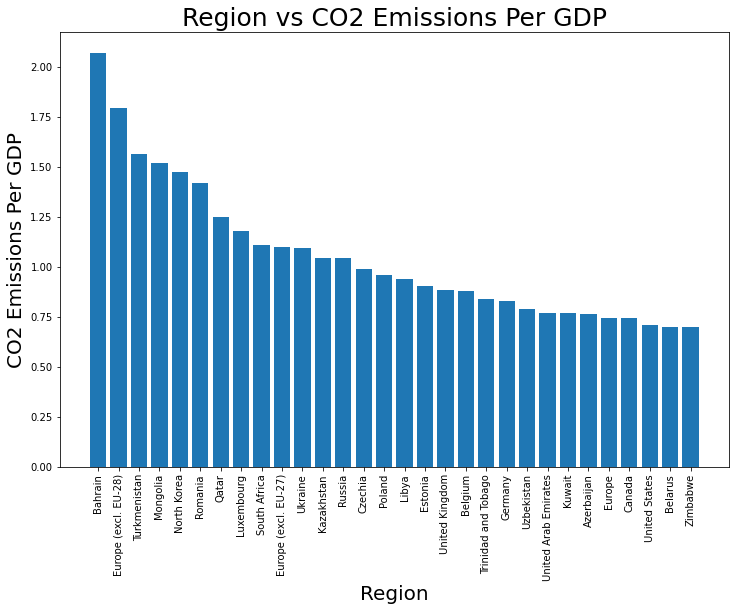

In [30]:
plt.figure(figsize=(12, 8))
plt.title('Region vs CO2 Emissions Per GDP', fontsize=25)
plt.xlabel('Region', fontsize=20)
plt.ylabel('CO2 Emissions Per GDP', fontsize=20)
plt.xticks(rotation=90)
plt.bar(co2_emission_country_df3.country[:30], co2_emission_country_df3.co2_per_gdp[:30])
plt.show()

In [31]:
co2_emission_year_df = co2_emission_df.groupby(by=co2_emission_df.year).sum()
co2_emission_year_df

,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1750,46.755,0.000,0.00,0.000,0.000,0.012,0.000,500.00,46.755,500.00,0.000,0.000,0.000,46.755,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,46.755,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,9.675051e+08,0.000000e+00,0.000,0.000,0.000
1751,46.755,0.000,0.00,0.000,0.000,0.000,0.000,500.00,93.505,500.00,0.000,0.000,0.000,46.755,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,93.505,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000
1752,46.770,0.000,0.20,0.020,0.000,0.000,0.000,500.00,140.275,500.00,0.000,0.000,0.000,46.770,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,140.275,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000
1753,46.770,0.000,0.00,0.000,0.000,0.000,0.000,500.00,187.045,500.00,0.000,0.000,0.000,46.770,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,187.045,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000
1754,46.790,0.000,0.20,0.020,0.000,0.000,0.000,500.00,233.835,500.00,0.000,0.000,0.000,46.790,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,233.835,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,123857.872,121002.559,448.79,83.142,-659.958,1154.129,866.039,351.73,5759050.453,381.61,44.191,37.437,43.711,49217.577,4815.970,1338.264,26193.854,41795.801,496.412,25.686,198.996,16.191,300.167,608.930,4.166,3719.68,337.16,336.53,369.66,387.31,350.79,421.97,132452.956,2764833.870,56900.466,820804.768,1970212.341,13405.949,372.27,386.96,368.36,393.49,370.26,431.17,101106.26,1480.963,17650.22,362.513,6291.99,107.669,2.213628e+10,1.056939e+14,361443.282,5445969.585,212.027
2016,123937.780,120833.976,563.17,79.890,-857.195,1130.748,849.942,351.85,5882988.218,380.89,44.379,37.052,43.536,48325.019,4930.264,1389.308,26911.855,41906.729,474.598,25.589,199.859,16.091,296.484,588.685,4.026,3377.16,336.88,336.41,374.06,387.71,350.03,424.56,137383.215,2813046.752,58289.740,847716.374,2012119.069,13880.554,370.85,386.01,368.53,393.30,369.87,430.98,100041.92,1415.378,17424.08,345.519,6291.93,105.005,2.238893e+10,2.147076e+14,366133.272,548

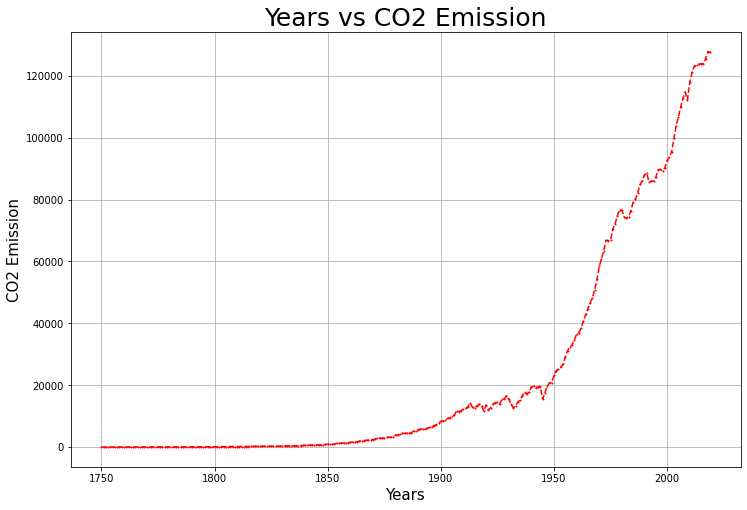

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(co2_emission_year_df.index, co2_emission_year_df.co2, 'ro--', markersize=1)
plt.title('Years vs CO2 Emission', fontsize=25)
plt.xlabel('Years', fontsize=15)
plt.ylabel('CO2 Emission', fontsize=15)
plt.grid()
plt.show()

In [33]:
co2_emission_year_df['log_co2'] = np.log(co2_emission_year_df['co2'])
co2_emission_year_df

,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,log_co2
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1750,46.755,0.000,0.00,0.000,0.000,0.012,0.000,500.00,46.755,500.00,0.000,0.000,0.000,46.755,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,46.755,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,9.675051e+08,0.000000e+00,0.000,0.000,0.000,3.844921
1751,46.755,0.000,0.00,0.000,0.000,0.000,0.000,500.00,93.505,500.00,0.000,0.000,0.000,46.755,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,93.505,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000,3.844921
1752,46.770,0.000,0.20,0.020,0.000,0.000,0.000,500.00,140.275,500.00,0.000,0.000,0.000,46.770,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,140.275,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000,3.845242
1753,46.770,0.000,0.00,0.000,0.000,0.000,0.000,500.00,187.045,500.00,0.000,0.000,0.000,46.770,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,187.045,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000,3.845242
1754,46.790,0.000,0.20,0.020,0.000,0.000,0.000,500.00,233.835,500.00,0.000,0.000,0.000,46.790,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,233.835,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000,3.845670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,123857.872,121002.559,448.79,83.142,-659.958,1154.129,866.039,351.73,5759050.453,381.61,44.191,37.437,43.711,49217.577,4815.970,1338.264,26193.854,41795.801,496.412,25.686,198.996,16.191,300.167,608.930,4.166,3719.68,337.16,336.53,369.66,387.31,350.79,421.97,132452.956,2764833.870,56900.466,820804.768,1970212.341,13405.949,372.27,386.96,368.36,393.49,370.26,431.17,101106.26,1480.963,17650.22,362.513,6291.99,107.669,2.213628e+10,1.056939e+14,361443.282,5445969.585,212.027,11.726890
2016,123937.780,120833.976,563.17,79.890,-857.195,1130.748,849.942,351.85,5882988.218,380.89,44.379,37.052,43.536,48325.019,4930.264,1389.308,26911.855,41906.729,474.598,25.589,199.859,16.091,296.484,588.685,4.026,3377.16,336.88,336.41,374.06,387.71,350.03,424.56,137383.215,2813046.752,58289.740,847716.374,2012119.069,13880.554,370.85,386.01,368.53,393.30,369.87,430.98,100041.92,1415.378,17424

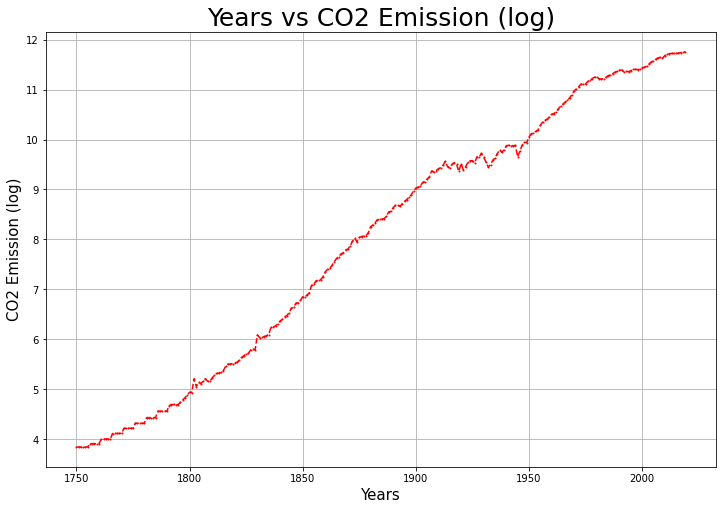

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(co2_emission_year_df.index, co2_emission_year_df.log_co2, 'ro--', markersize=1)
plt.title('Years vs CO2 Emission (log)', fontsize=25)
plt.xlabel('Years', fontsize=15)
plt.ylabel('CO2 Emission (log)', fontsize=15)
plt.grid()
plt.show()

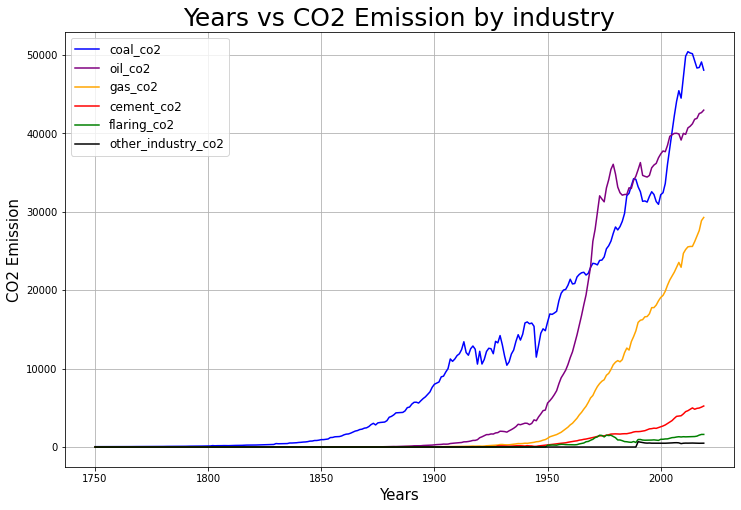

In [35]:
plt.figure(figsize=(12, 8))
plt.plot(co2_emission_year_df.index, co2_emission_year_df.coal_co2, 'blue', markersize=1, label='coal_co2')
plt.plot(co2_emission_year_df.index, co2_emission_year_df.oil_co2, 'purple', markersize=1, label='oil_co2')
plt.plot(co2_emission_year_df.index, co2_emission_year_df.gas_co2, 'orange', markersize=1, label='gas_co2')
plt.plot(co2_emission_year_df.index, co2_emission_year_df.cement_co2, 'red', markersize=1, label='cement_co2')
plt.plot(co2_emission_year_df.index, co2_emission_year_df.flaring_co2, 'green', markersize=1, label='flaring_co2')
plt.plot(co2_emission_year_df.index, co2_emission_year_df.other_industry_co2, 'black', markersize=1, label='other_industry_co2')
plt.title('Years vs CO2 Emission by industry', fontsize=25)
plt.xlabel('Years', fontsize=15)
plt.ylabel('CO2 Emission', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

## Disaster Data

In [36]:
disaster_df = pd.read_csv(dir_path + '/data/disaster.csv')
disaster_df.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [37]:
disaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entity                                                     828 non-null    object 
 1   Code                                                       0 non-null      float64
 2   Year                                                       828 non-null    int64  
 3   Number of reported natural disasters (reported disasters)  828 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 26.0+ KB


In [39]:
disaster_df.drop('Code', axis=1, inplace=True)
disaster_df

,Entity,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9
3,All natural disasters,1903,8
4,All natural disasters,1904,2
...,...,...,...
823,Wildfire,2014,4
824,Wildfire,2015,12
825,Wildfire,2016,10
826,Wildfire,2017,13


In [42]:
disaster_df.Entity.unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

In [46]:
disaster_df.rename(columns={'Number of reported natural disasters (reported disasters)': 'reported'}, inplace=True)

In [47]:
disaster_df

,Entity,Year,reported
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9
3,All natural disasters,1903,8
4,All natural disasters,1904,2
...,...,...,...
823,Wildfire,2014,4
824,Wildfire,2015,12
825,Wildfire,2016,10
826,Wildfire,2017,13


In [48]:
disaster_df[disaster_df['Entity']=='All natural disasters']

,Entity,Year,reported
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9
3,All natural disasters,1903,8
4,All natural disasters,1904,2
...,...,...,...
114,All natural disasters,2014,320
115,All natural disasters,2015,380
116,All natural disasters,2016,325
117,All natural disasters,2017,276


In [50]:
def reported_disaster_df(entity):
    return disaster_df[disaster_df['Entity']==entity]

In [52]:
reported_disaster_df('All natural disasters')

,Entity,Year,reported
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9
3,All natural disasters,1903,8
4,All natural disasters,1904,2
...,...,...,...
114,All natural disasters,2014,320
115,All natural disasters,2015,380
116,All natural disasters,2016,325
117,All natural disasters,2017,276


In [54]:
disaster_df

,Entity,Year,reported
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9
3,All natural disasters,1903,8
4,All natural disasters,1904,2
...,...,...,...
823,Wildfire,2014,4
824,Wildfire,2015,12
825,Wildfire,2016,10
826,Wildfire,2017,13


In [55]:
disaster_df.set_index(['Entity', 'Year'])

reported
Entity                Year          
All natural disasters 1900         5
                      1901         2
                      1902         9
                      1903         8
                      1904         2
...                              ...
Wildfire              2014         4
                      2015        12
                      2016        10
                      2017        13
                      2018        10

[828 rows x 1 columns]

In [56]:
index = pd.MultiIndex.from_product(disaster_df.set_index(['Entity', 'Year']).index.levels)

In [59]:
disaster_processed_df = disaster_df.set_index(['Entity', 'Year']).reindex(index)
disaster_processed_df

reported
Entity                Year          
All natural disasters 1900       5.0
                      1901       2.0
                      1902       9.0
                      1903       8.0
                      1904       2.0
...                              ...
Wildfire              2014       4.0
                      2015      12.0
                      2016      10.0
                      2017      13.0
                      2018      10.0

[1309 rows x 1 columns]

In [74]:
disaster_processed_df.reset_index(inplace=True)

In [75]:
disaster_processed_df

,Entity,Year,reported
0,All natural disasters,1900,5.0
1,All natural disasters,1901,2.0
2,All natural disasters,1902,9.0
3,All natural disasters,1903,8.0
4,All natural disasters,1904,2.0
...,...,...,...
1304,Wildfire,2014,4.0
1305,Wildfire,2015,12.0
1306,Wildfire,2016,10.0
1307,Wildfire,2017,13.0


In [76]:
def reported_disaster_processed_df(entity):
    return disaster_processed_df[disaster_processed_df['Entity']==entity]

In [77]:
reported_disaster_processed_df('All natural disasters')

,Entity,Year,reported
0,All natural disasters,1900,5.0
1,All natural disasters,1901,2.0
2,All natural disasters,1902,9.0
3,All natural disasters,1903,8.0
4,All natural disasters,1904,2.0
...,...,...,...
114,All natural disasters,2014,320.0
115,All natural disasters,2015,380.0
116,All natural disasters,2016,325.0
117,All natural disasters,2017,276.0


In [88]:
def get_disaster_numbers(entity):
    return reported_disaster_processed_df(entity).reset_index()['reported']

In [89]:
get_disaster_numbers('All natural disasters')

0        5.0
1        2.0
2        9.0
3        8.0
4        2.0
       ...  
114    320.0
115    380.0
116    325.0
117    276.0
118    282.0
Name: reported, Length: 119, dtype: float64

In [90]:
all_disasters_df = reported_disaster_processed_df('All natural disasters').drop('Entity', axis=1)
all_disasters_df.rename(columns={'reported': 'All'}, inplace=True)
all_disasters_df

,Year,All
0,1900,5.0
1,1901,2.0
2,1902,9.0
3,1903,8.0
4,1904,2.0
...,...,...
114,2014,320.0
115,2015,380.0
116,2016,325.0
117,2017,276.0


In [91]:
for i, entity in enumerate(disaster_df.Entity.unique()):
    if i == 0:
        continue
    all_disasters_df[entity] = get_disaster_numbers(entity)


In [92]:
all_disasters_df

,Year,All,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
0,1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1,1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN
3,1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
4,1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
114,2014,320.0,18.0,26.0,17.0,99.0,135.0,NaN,15.0,NaN,6.0,4.0
115,2015,380.0,28.0,23.0,12.0,118.0,160.0,NaN,20.0,1.0,6.0,12.0
116,2016,325.0,15.0,30.0,12.0,84.0,161.0,NaN,13.0,NaN,NaN,10.0
117,2017,276.0,7.0,19.0,11.0,85.0,114.0,NaN,25.0,NaN,2.0,13.0


In [93]:
all_disasters_df.fillna(0, inplace=True)
all_disasters_df

,Year,All,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
0,1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
3,1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0
4,1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
114,2014,320.0,18.0,26.0,17.0,99.0,135.0,0.0,15.0,0.0,6.0,4.0
115,2015,380.0,28.0,23.0,12.0,118.0,160.0,0.0,20.0,1.0,6.0,12.0
116,2016,325.0,15.0,30.0,12.0,84.0,161.0,0.0,13.0,0.0,0.0,10.0
117,2017,276.0,7.0,19.0,11.0,85.0,114.0,0.0,25.0,0.0,2.0,13.0


In [131]:
all_disasters_df['All'] = all_disasters_df['All'] - all_disasters_df['Impact']
all_disasters_df.drop('Impact', axis=1, inplace=True)
all_disasters_df

,Year,All,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Landslide,Mass movement (dry),Volcanic activity,Wildfire
0,1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0
3,1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0
4,1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
114,2014,320.0,18.0,26.0,17.0,99.0,135.0,15.0,0.0,6.0,4.0
115,2015,380.0,28.0,23.0,12.0,118.0,160.0,20.0,1.0,6.0,12.0
116,2016,325.0,15.0,30.0,12.0,84.0,161.0,13.0,0.0,0.0,10.0
117,2017,276.0,7.0,19.0,11.0,85.0,114.0,25.0,0.0,2.0,13.0


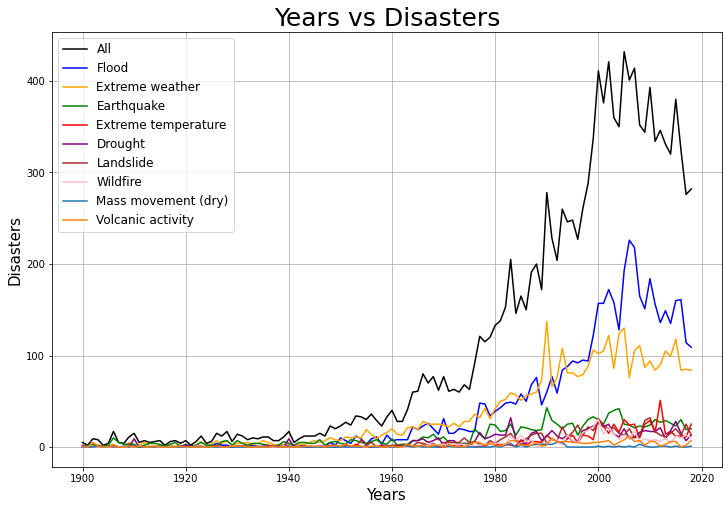

In [154]:
plt.figure(figsize=(12, 8))
plt.plot(all_disasters_df.Year, all_disasters_df.All, 'black', label='All')
plt.plot(all_disasters_df.Year, all_disasters_df.Flood, 'blue', label='Flood')
plt.plot(all_disasters_df.Year, all_disasters_df['Extreme weather'], 'orange', label='Extreme weather')

plt.plot(all_disasters_df.Year, all_disasters_df.Earthquake, 'green', label='Earthquake')
plt.plot(all_disasters_df.Year, all_disasters_df['Extreme temperature'], 'red', label='Extreme temperature')
plt.plot(all_disasters_df.Year, all_disasters_df.Drought, 'purple', label='Drought')

plt.plot(all_disasters_df.Year, all_disasters_df.Landslide, 'brown', label='Landslide')
plt.plot(all_disasters_df.Year, all_disasters_df.Wildfire, 'pink', label='Wildfire')
plt.plot(all_disasters_df.Year, all_disasters_df['Mass movement (dry)'], label='Mass movement (dry)')
plt.plot(all_disasters_df.Year, all_disasters_df['Volcanic activity'], label='Volcanic activity')

plt.title('Years vs Disasters', fontsize=25)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Disasters', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

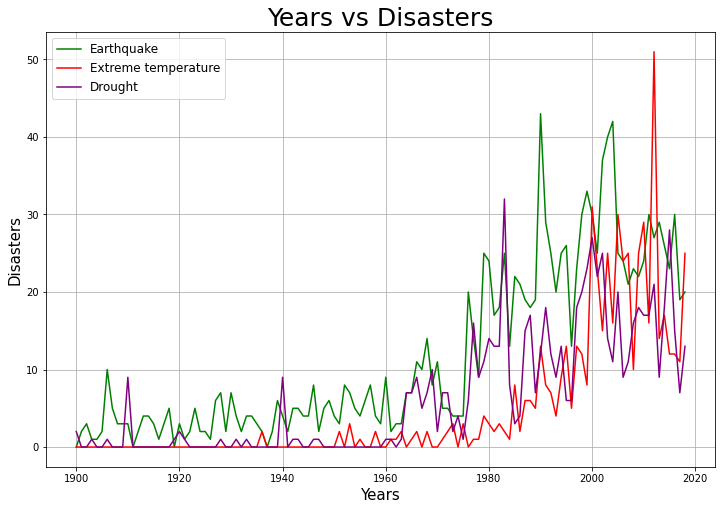

In [155]:
plt.figure(figsize=(12, 8))
# plt.plot(all_disasters_df.Year, all_disasters_df.All, 'black', label='All')
# plt.plot(all_disasters_df.Year, all_disasters_df.Flood, 'blue', label='Flood')
# plt.plot(all_disasters_df.Year, all_disasters_df['Extreme weather'], 'orange', label='Extreme weather')

plt.plot(all_disasters_df.Year, all_disasters_df.Earthquake, 'green', label='Earthquake')
plt.plot(all_disasters_df.Year, all_disasters_df['Extreme temperature'], 'red', label='Extreme temperature')
plt.plot(all_disasters_df.Year, all_disasters_df.Drought, 'purple', label='Drought')

# plt.plot(all_disasters_df.Year, all_disasters_df.Landslide, 'brown', label='Landslide')
# plt.plot(all_disasters_df.Year, all_disasters_df.Wildfire, 'pink', label='Wildfire')
# plt.plot(all_disasters_df.Year, all_disasters_df['Mass movement (dry)'], label='Mass movement (dry)')
# plt.plot(all_disasters_df.Year, all_disasters_df['Volcanic activity'], label='Volcanic activity')

plt.title('Years vs Disasters', fontsize=25)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Disasters', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

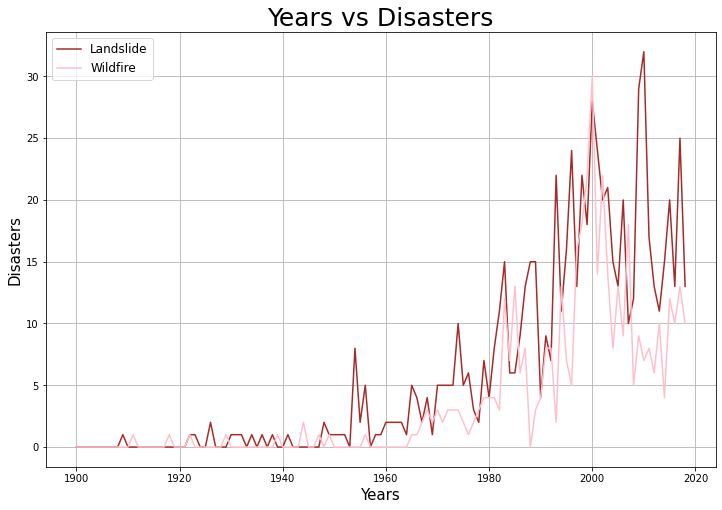

In [156]:
plt.figure(figsize=(12, 8))
# plt.plot(all_disasters_df.Year, all_disasters_df.All, 'black', label='All')
# plt.plot(all_disasters_df.Year, all_disasters_df.Flood, 'blue', label='Flood')
# plt.plot(all_disasters_df.Year, all_disasters_df['Extreme weather'], 'orange', label='Extreme weather')

# plt.plot(all_disasters_df.Year, all_disasters_df.Earthquake, 'green', label='Earthquake')
# plt.plot(all_disasters_df.Year, all_disasters_df['Extreme temperature'], 'red', label='Extreme temperature')
# plt.plot(all_disasters_df.Year, all_disasters_df.Drought, 'purple', label='Drought')

plt.plot(all_disasters_df.Year, all_disasters_df.Landslide, 'brown', label='Landslide')
plt.plot(all_disasters_df.Year, all_disasters_df.Wildfire, 'pink', label='Wildfire')
# plt.plot(all_disasters_df.Year, all_disasters_df['Mass movement (dry)'], label='Mass movement (dry)')
# plt.plot(all_disasters_df.Year, all_disasters_df['Volcanic activity'], label='Volcanic activity')

plt.title('Years vs Disasters', fontsize=25)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Disasters', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

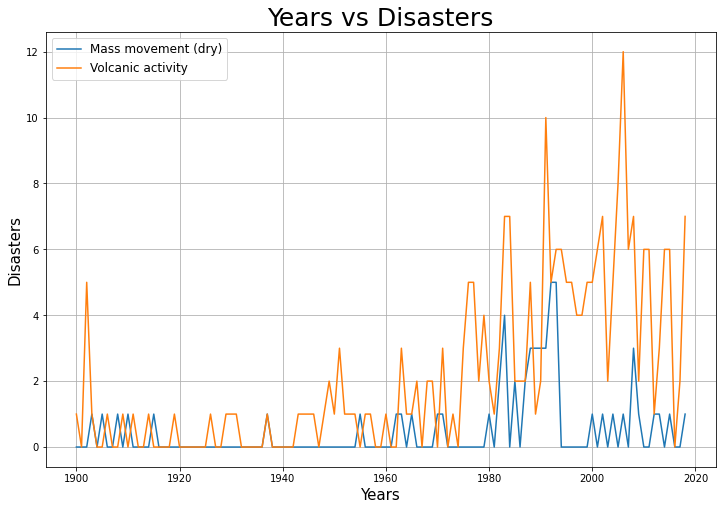

In [157]:
plt.figure(figsize=(12, 8))
# plt.plot(all_disasters_df.Year, all_disasters_df.All, 'black', label='All')
# plt.plot(all_disasters_df.Year, all_disasters_df.Flood, 'blue', label='Flood')
# plt.plot(all_disasters_df.Year, all_disasters_df['Extreme weather'], 'orange', label='Extreme weather')

# plt.plot(all_disasters_df.Year, all_disasters_df.Earthquake, 'green', label='Earthquake')
# plt.plot(all_disasters_df.Year, all_disasters_df['Extreme temperature'], 'red', label='Extreme temperature')
# plt.plot(all_disasters_df.Year, all_disasters_df.Drought, 'purple', label='Drought')

# plt.plot(all_disasters_df.Year, all_disasters_df.Landslide, 'brown', label='Landslide')
# plt.plot(all_disasters_df.Year, all_disasters_df.Wildfire, 'pink', label='Wildfire')
plt.plot(all_disasters_df.Year, all_disasters_df['Mass movement (dry)'], label='Mass movement (dry)')
plt.plot(all_disasters_df.Year, all_disasters_df['Volcanic activity'], label='Volcanic activity')

plt.title('Years vs Disasters', fontsize=25)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Disasters', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [98]:
all_disasters_df[all_disasters_df['Year']==2018]

,Year,All,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
118,2018,282.0,13.0,20.0,25.0,84.0,109.0,0.0,13.0,1.0,7.0,10.0


In [150]:
all_disasters_sorted_df = all_disasters_df[['Year', 'All', 'Flood', 'Extreme weather', 'Earthquake', 'Extreme temperature', 'Drought', 'Landslide', 'Wildfire', 'Mass movement (dry)', 'Volcanic activity']]
all_disasters_sorted_df

,Year,All,Flood,Extreme weather,Earthquake,Extreme temperature,Drought,Landslide,Wildfire,Mass movement (dry),Volcanic activity
0,1900,5.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
1,1901,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1902,9.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1903,8.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1904,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
114,2014,320.0,135.0,99.0,26.0,17.0,18.0,15.0,4.0,0.0,6.0
115,2015,380.0,160.0,118.0,23.0,12.0,28.0,20.0,12.0,1.0,6.0
116,2016,325.0,161.0,84.0,30.0,12.0,15.0,13.0,10.0,0.0,0.0
117,2017,276.0,114.0,85.0,19.0,11.0,7.0,25.0,13.0,0.0,2.0


In [151]:
all_disasters_sorted_df[all_disasters_sorted_df['Year']==2018]

,Year,All,Flood,Extreme weather,Earthquake,Extreme temperature,Drought,Landslide,Wildfire,Mass movement (dry),Volcanic activity
118,2018,282.0,109.0,84.0,20.0,25.0,13.0,13.0,10.0,1.0,7.0


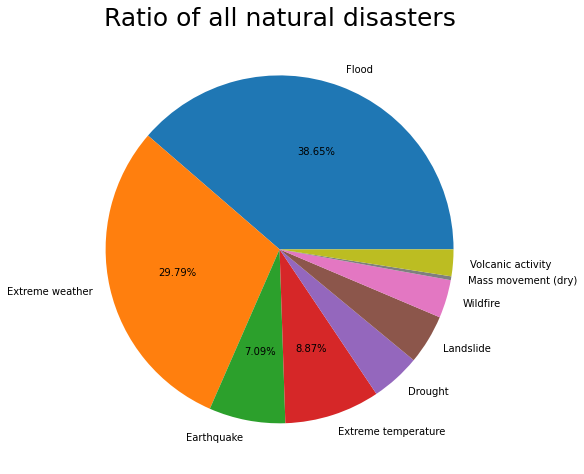

In [152]:
ratio = all_disasters_sorted_df[all_disasters_sorted_df['Year']==2018].values[0, 2:]
labels = all_disasters_sorted_df.columns[2:]

def pie_print_form(x):
    return f'{x:.2f}%' if x > 7 else None

plt.figure(figsize=(12, 8))
plt.pie(ratio, labels=labels, autopct=pie_print_form)
plt.title('Ratio of all natural disasters', fontsize=25)
plt.show()

## All Data Combination

In [161]:
temp_df2

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_top,Uncertainty_bot
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083
...,...,...,...,...,...
261,2011,9.516000,0.082000,9.598000,9.434000
262,2012,9.507333,0.083417,9.590750,9.423917
263,2013,9.606500,0.097667,9.704167,9.508833
264,2014,9.570667,0.090167,9.660833,9.480500


In [176]:
temp_data = temp_df2[['year', 'LandAverageTemperature']]
temp_data.rename(columns={'year': 'Year', 'LandAverageTemperature': 'Temperature'}, inplace=True)
temp_data['Year'] = temp_data.Year.astype(int)
temp_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,Temperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


In [177]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         266 non-null    int64  
 1   Temperature  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [162]:
co2_df2

,month,decimal,average,trend
year,,,,
1980,6.5,1980.50,338.910833,338.911667
1981,6.5,1981.50,340.105000,340.105000
1982,6.5,1982.50,340.856667,340.855833
1983,6.5,1983.50,342.530833,342.531667
1984,6.5,1984.50,344.075833,344.075000
1985,6.5,1985.50,345.544167,345.544167
1986,6.5,1986.50,346.963333,346.961667
1987,6.5,1987.50,348.674167,348.675000
1988,6.5,1988.50,351.158333,351.158333


In [166]:
co2_concentration_data = co2_df2.reset_index().rename(columns={'year': 'Year', 'average': 'co2_concentration'})[['Year', 'co2_concentration']]
co2_concentration_data

,Year,co2_concentration
0,1980,338.910833
1,1981,340.105000
2,1982,340.856667
3,1983,342.530833
4,1984,344.075833
5,1985,345.544167
6,1986,346.963333
7,1987,348.674167
8,1988,351.158333
9,1989,352.782500


In [178]:
co2_concentration_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               42 non-null     int64  
 1   co2_concentration  42 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 800.0 bytes


In [163]:
co2_emission_year_df

,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,log_co2
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1750,46.755,0.000,0.00,0.000,0.000,0.012,0.000,500.00,46.755,500.00,0.000,0.000,0.000,46.755,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,46.755,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,9.675051e+08,0.000000e+00,0.000,0.000,0.000,3.844921
1751,46.755,0.000,0.00,0.000,0.000,0.000,0.000,500.00,93.505,500.00,0.000,0.000,0.000,46.755,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,93.505,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000,3.844921
1752,46.770,0.000,0.20,0.020,0.000,0.000,0.000,500.00,140.275,500.00,0.000,0.000,0.000,46.770,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,140.275,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000,3.845242
1753,46.770,0.000,0.00,0.000,0.000,0.000,0.000,500.00,187.045,500.00,0.000,0.000,0.000,46.770,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,187.045,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000,3.845242
1754,46.790,0.000,0.20,0.020,0.000,0.000,0.000,500.00,233.835,500.00,0.000,0.000,0.000,46.790,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.000,233.835,0.000,0.000,0.000,0.000,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000,3.845670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,123857.872,121002.559,448.79,83.142,-659.958,1154.129,866.039,351.73,5759050.453,381.61,44.191,37.437,43.711,49217.577,4815.970,1338.264,26193.854,41795.801,496.412,25.686,198.996,16.191,300.167,608.930,4.166,3719.68,337.16,336.53,369.66,387.31,350.79,421.97,132452.956,2764833.870,56900.466,820804.768,1970212.341,13405.949,372.27,386.96,368.36,393.49,370.26,431.17,101106.26,1480.963,17650.22,362.513,6291.99,107.669,2.213628e+10,1.056939e+14,361443.282,5445969.585,212.027,11.726890
2016,123937.780,120833.976,563.17,79.890,-857.195,1130.748,849.942,351.85,5882988.218,380.89,44.379,37.052,43.536,48325.019,4930.264,1389.308,26911.855,41906.729,474.598,25.589,199.859,16.091,296.484,588.685,4.026,3377.16,336.88,336.41,374.06,387.71,350.03,424.56,137383.215,2813046.752,58289.740,847716.374,2012119.069,13880.554,370.85,386.01,368.53,393.30,369.87,430.98,100041.92,1415.378,17424

In [167]:
co2_emission_data = co2_emission_year_df.reset_index().rename(columns={'year': 'Year', 'co2': 'all_co2_emission', 'log_co2': 'log_all_co2_emission'})[['Year', 'all_co2_emission', 'log_all_co2_emission', 'coal_co2', 'cement_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2']]
co2_emission_data

,Year,all_co2_emission,log_all_co2_emission,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2
0,1750,46.755,3.844921,46.755,0.000,0.000,0.000,0.000,0.000
1,1751,46.755,3.844921,46.755,0.000,0.000,0.000,0.000,0.000
2,1752,46.770,3.845242,46.770,0.000,0.000,0.000,0.000,0.000
3,1753,46.770,3.845242,46.770,0.000,0.000,0.000,0.000,0.000
4,1754,46.790,3.845670,46.790,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
265,2015,123857.872,11.726890,49217.577,4815.970,1338.264,26193.854,41795.801,496.412
266,2016,123937.780,11.727535,48325.019,4930.264,1389.308,26911.855,41906.729,474.598
267,2017,125484.864,11.739940,48393.214,4972.869,1519.793,27598.832,42518.788,481.366
268,2018,127794.922,11.758182,49098.274,5089.716,1608.089,28867.103,42640.879,490.869


In [179]:
co2_emission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  270 non-null    int64  
 1   all_co2_emission      270 non-null    float64
 2   log_all_co2_emission  270 non-null    float64
 3   coal_co2              270 non-null    float64
 4   cement_co2            270 non-null    float64
 5   flaring_co2           270 non-null    float64
 6   gas_co2               270 non-null    float64
 7   oil_co2               270 non-null    float64
 8   other_industry_co2    270 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 19.1 KB


In [169]:
all_disasters_sorted_df

,Year,All,Flood,Extreme weather,Earthquake,Extreme temperature,Drought,Landslide,Wildfire,Mass movement (dry),Volcanic activity
0,1900,5.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
1,1901,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1902,9.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1903,8.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1904,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
114,2014,320.0,135.0,99.0,26.0,17.0,18.0,15.0,4.0,0.0,6.0
115,2015,380.0,160.0,118.0,23.0,12.0,28.0,20.0,12.0,1.0,6.0
116,2016,325.0,161.0,84.0,30.0,12.0,15.0,13.0,10.0,0.0,0.0
117,2017,276.0,114.0,85.0,19.0,11.0,7.0,25.0,13.0,0.0,2.0


In [170]:
disasters_data = all_disasters_sorted_df.rename(columns={'All': 'all_disasters'})
disasters_data

,Year,all_disasters,Flood,Extreme weather,Earthquake,Extreme temperature,Drought,Landslide,Wildfire,Mass movement (dry),Volcanic activity
0,1900,5.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
1,1901,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1902,9.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1903,8.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1904,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
114,2014,320.0,135.0,99.0,26.0,17.0,18.0,15.0,4.0,0.0,6.0
115,2015,380.0,160.0,118.0,23.0,12.0,28.0,20.0,12.0,1.0,6.0
116,2016,325.0,161.0,84.0,30.0,12.0,15.0,13.0,10.0,0.0,0.0
117,2017,276.0,114.0,85.0,19.0,11.0,7.0,25.0,13.0,0.0,2.0


In [180]:
disasters_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 119 non-null    int64  
 1   all_disasters        119 non-null    float64
 2   Flood                119 non-null    float64
 3   Extreme weather      119 non-null    float64
 4   Earthquake           119 non-null    float64
 5   Extreme temperature  119 non-null    float64
 6   Drought              119 non-null    float64
 7   Landslide            119 non-null    float64
 8   Wildfire             119 non-null    float64
 9   Mass movement (dry)  119 non-null    float64
 10  Volcanic activity    119 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 11.2 KB


In [181]:
# combine temp_data, co2_concentration_data, co2_emission_data, disasters_data
final_df = pd.merge(left=temp_data, right=co2_concentration_data, how='inner', on='Year')
final_df = pd.merge(left=final_df, right=co2_emission_data, how='inner', on='Year')
final_df = pd.merge(left=final_df, right=disasters_data, how='inner', on='Year')
final_df

,Year,Temperature,co2_concentration,all_co2_emission,log_all_co2_emission,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,all_disasters,Flood,Extreme weather,Earthquake,Extreme temperature,Drought,Landslide,Wildfire,Mass movement (dry),Volcanic activity
0,1980,8.980333,338.910833,76563.972,11.245882,28059.868,1677.528,1191.343,10819.085,34816.149,0.000,133.0,39.0,42.0,24.0,3.0,14.0,4.0,4.0,1.0,2.0
1,1981,9.165833,340.105000,74416.512,11.217433,27680.830,1666.917,900.075,11020.051,33150.405,0.000,138.0,43.0,50.0,17.0,2.0,13.0,8.0,4.0,0.0,1.0
2,1982,8.639167,340.856667,73934.376,11.210933,28104.124,1652.613,899.746,10864.161,32415.447,0.000,153.0,48.0,52.0,18.0,3.0,13.0,11.0,3.0,2.0,3.0
3,1983,9.028167,342.530833,74520.783,11.218833,28773.774,1683.802,809.745,11139.445,32114.104,0.000,205.0,49.0,59.0,25.0,2.0,32.0,15.0,12.0,4.0,7.0
4,1984,8.691833,344.075833,76401.405,11.243756,29779.564,1698.853,696.211,12024.942,32201.834,0.000,146.0,47.0,57.0,13.0,1.0,8.0,6.0,7.0,0.0,7.0
5,1985,8.658000,345.544167,79237.478,11.280205,32037.060,1699.137,673.850,12618.784,32208.990,0.000,165.0,58.0,51.0,22.0,8.0,3.0,6.0,13.0,2.0,2.0
6,1986,8.833583,346.963333,80157.450,11.291748,32355.870,1757.714,623.047,12363.755,33057.080,0.000,150.0,50.0,56.0,21.0,2.0,4.0,9.0,6.0,0.0,2.0
7,1987,8.994417,348.674167,82140.353,11.316185,33316.924,1821.387,600.962,13435.601,32965.485,0.000,191.0,68.0,58.0,19.0,6.0,15.0,13.0,8.0,2.0,2.0
8,1988,9.201583,351.158333,84903.872,11.349275,34210.154,1919.897,697.290,14077.429,33999.118,0.000,200.0,76.0,60.0,18.0,6.0,17.0,15.0,0.0,3.0,5.0
9,1989,8.922000,352.782500,86013.824,11.362263,34132.685,1966.190,582.613,14805.146,34527.193,0.000,172.0,46.0,73.0,19.0,5.0,7.0,15.0,3.0,3.0,1.0


In [182]:
final_df.head()

,Year,Temperature,co2_concentration,all_co2_emission,log_all_co2_emission,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,all_disasters,Flood,Extreme weather,Earthquake,Extreme temperature,Drought,Landslide,Wildfire,Mass movement (dry),Volcanic activity
0,1980,8.980333,338.910833,76563.972,11.245882,28059.868,1677.528,1191.343,10819.085,34816.149,0.0,133.0,39.0,42.0,24.0,3.0,14.0,4.0,4.0,1.0,2.0
1,1981,9.165833,340.105000,74416.512,11.217433,27680.830,1666.917,900.075,11020.051,33150.405,0.0,138.0,43.0,50.0,17.0,2.0,13.0,8.0,4.0,0.0,1.0
2,1982,8.639167,340.856667,73934.376,11.210933,28104.124,1652.613,899.746,10864.161,32415.447,0.0,153.0,48.0,52.0,18.0,3.0,13.0,11.0,3.0,2.0,3.0
3,1983,9.028167,342.530833,74520.783,11.218833,28773.774,1683.802,809.745,11139.445,32114.104,0.0,205.0,49.0,59.0,25.0,2.0,32.0,15.0,12.0,4.0,7.0
4,1984,8.691833,344.075833,76401.405,11.243756,29779.564,1698.853,696.211,12024.942,32201.834,0.0,146.0,47.0,57.0,13.0,1.0,8.0,6.0,7.0,0.0,7.0


In [183]:
final_df.tail()

,Year,Temperature,co2_concentration,all_co2_emission,log_all_co2_emission,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,all_disasters,Flood,Extreme weather,Earthquake,Extreme temperature,Drought,Landslide,Wildfire,Mass movement (dry),Volcanic activity
31,2011,9.516000,390.634167,121193.743,11.705146,49829.456,4514.846,1298.302,25183.069,39867.493,500.582,334.0,156.0,84.0,30.0,16.0,17.0,17.0,8.0,0.0,6.0
32,2012,9.507333,392.652500,123057.597,11.720408,50408.172,4631.780,1310.063,25524.424,40688.001,495.165,346.0,136.0,90.0,27.0,51.0,21.0,13.0,6.0,1.0,1.0
33,2013,9.606500,395.395000,123338.407,11.722687,50241.643,4807.279,1310.376,25574.586,40900.100,504.428,331.0,149.0,105.0,29.0,14.0,9.0,11.0,10.0,1.0,3.0
34,2014,9.570667,397.345833,123774.735,11.726219,50147.930,4987.969,1339.948,25577.383,41213.538,507.977,320.0,135.0,99.0,26.0,17.0,18.0,15.0,4.0,0.0,6.0
35,2015,9.831000,399.648333,123857.872,11.726890,49217.577,4815.970,1338.264,26193.854,41795.801,496.412,380.0,160.0,118.0,23.0,12.0,28.0,20.0,12.0,1.0,6.0


In [185]:
final_df.set_index('Year', inplace=True)
final_df

,Temperature,co2_concentration,all_co2_emission,log_all_co2_emission,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,all_disasters,Flood,Extreme weather,Earthquake,Extreme temperature,Drought,Landslide,Wildfire,Mass movement (dry),Volcanic activity
Year,,,,,,,,,,,,,,,,,,,,
1980,8.980333,338.910833,76563.972,11.245882,28059.868,1677.528,1191.343,10819.085,34816.149,0.000,133.0,39.0,42.0,24.0,3.0,14.0,4.0,4.0,1.0,2.0
1981,9.165833,340.105000,74416.512,11.217433,27680.830,1666.917,900.075,11020.051,33150.405,0.000,138.0,43.0,50.0,17.0,2.0,13.0,8.0,4.0,0.0,1.0
1982,8.639167,340.856667,73934.376,11.210933,28104.124,1652.613,899.746,10864.161,32415.447,0.000,153.0,48.0,52.0,18.0,3.0,13.0,11.0,3.0,2.0,3.0
1983,9.028167,342.530833,74520.783,11.218833,28773.774,1683.802,809.745,11139.445,32114.104,0.000,205.0,49.0,59.0,25.0,2.0,32.0,15.0,12.0,4.0,7.0
1984,8.691833,344.075833,76401.405,11.243756,29779.564,1698.853,696.211,12024.942,32201.834,0.000,146.0,47.0,57.0,13.0,1.0,8.0,6.0,7.0,0.0,7.0
1985,8.658000,345.544167,79237.478,11.280205,32037.060,1699.137,673.850,12618.784,32208.990,0.000,165.0,58.0,51.0,22.0,8.0,3.0,6.0,13.0,2.0,2.0
1986,8.833583,346.963333,80157.450,11.291748,32355.870,1757.714,623.047,12363.755,33057.080,0.000,150.0,50.0,56.0,21.0,2.0,4.0,9.0,6.0,0.0,2.0
1987,8.994417,348.674167,82140.353,11.316185,33316.924,1821.387,600.962,13435.601,32965.485,0.000,191.0,68.0,58.0,19.0,6.0,15.0,13.0,8.0,2.0,2.0
1988,9.201583,351.158333,84903.872,11.349275,34210.154,1919.897,697.290,14077.429,33999.118,0.000,200.0,76.0,60.0,18.0,6.0,17.0,15.0,0.0,3.0,5.0


In [186]:
final_df.corr()

,Temperature,co2_concentration,all_co2_emission,log_all_co2_emission,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,all_disasters,Flood,Extreme weather,Earthquake,Extreme temperature,Drought,Landslide,Wildfire,Mass movement (dry),Volcanic activity
Temperature,1.000000,0.857015,0.828405,0.840196,0.731592,0.815170,0.775154,0.852067,0.884511,0.629953,0.848938,0.841758,0.647422,0.398785,0.660019,0.436214,0.448983,0.298407,-0.422834,0.279227
co2_concentration,0.857015,1.000000,0.980881,0.986083,0.912890,0.973272,0.830891,0.994738,0.964980,0.680025,0.839761,0.848633,0.660266,0.311369,0.693185,0.292372,0.470799,0.213669,-0.328217,0.256571
all_co2_emission,0.828405,0.980881,1.000000,0.997578,0.969541,0.989471,0.858771,0.975885,0.956513,0.612249,0.769751,0.806734,0.592170,0.256928,0.677662,0.223881,0.367131,0.079389,-0.275707,0.223757
log_all_co2_emission,0.840196,0.986083,0.997578,1.000000,0.955349,0.979950,0.848261,0.985187,0.964698,0.648601,0.797489,0.827317,0.622618,0.284303,0.692151,0.222407,0.391932,0.107755,-0.277262,0.239741
coal_co2,0.731592,0.912890,0.969541,0.955349,1.000000,0.965695,0.798323,0.899345,0.867722,0.445599,0.624402,0.695978,0.451199,0.132026,0.601063,0.137784,0.258798,-0.073158,-0.211492,0.141740
cement_co2,0.815170,0.973272,0.989471,0.979950,0.965695,1.000000,0.872705,0.957807,0.938035,0.555635,0.738368,0.784623,0.544150,0.211663,0.650243,0.249885,0.363967,0.083958,-0.318319,0.199646
flaring_co2,0.775154,0.830891,0.858771,0.848261,0.798323,0.872705,1.000000,0.826613,0.889708,0.592763,0.701941,0.740024,0.510677,0.281895,0.616344,0.302258,0.255729,0.062427,-0.266678,0.260033
gas_co2,0.852067,0.994738,0.975885,0.985187,0.899345,0.957807,0.826613,1.000000,0.964623,0.732667,0.850637,0.852871,0.685358,0.333508,0.705911,0.266368,0.469080,0.210647,-0.305326,0.275870
oil_co2,0.884511,0.964980,0.956513,0.964698,0.867722,0.938035,0.889708,0.964623,1.000000,0.694522,0.858747,0.866893,0.678082,0.379962,0.709031,0.308396,0.406332,0.207296,-0.327510,0.286432
other_industry_co2,0.629953,0.680025,0.612249,0.648601,0.445599,0.555635,0.592763,0.732667,0.694522,1.000000,0.743763,0.641612,0.763856,0.538173,0.531149,0.189796,0.341639,0.313690,-0.117212,0.414773


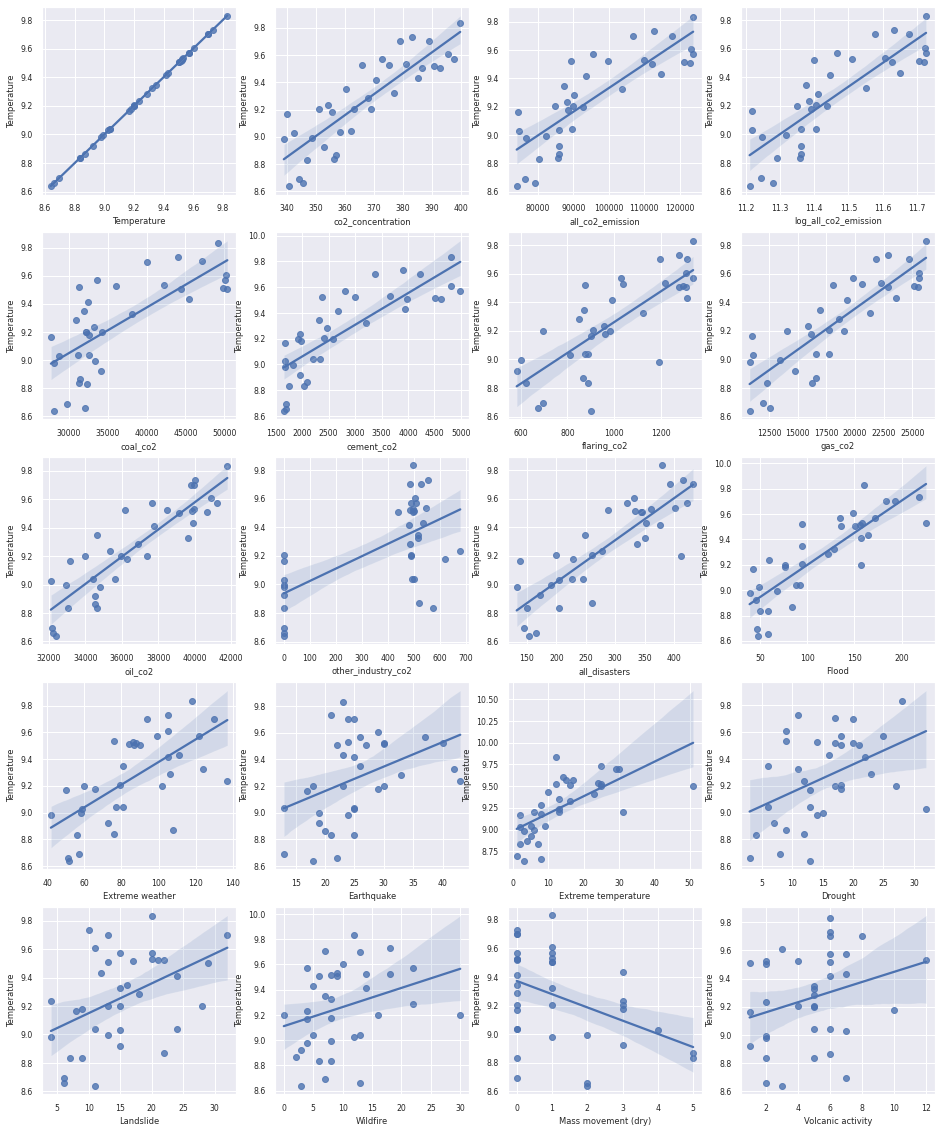

In [533]:
# sample_df = df.sample(n=1000, random_state=1)
import seaborn as sns
sns.set(font_scale=0.7)
fig, axs = plt.subplots(figsize=(16, 20), ncols=4, nrows=5)
features = final_df.columns

for i, feature in enumerate(features):
    row, col = divmod(i, 4)
    sns.regplot(x=feature, y='Temperature', data=final_df, ax=axs[row][col])

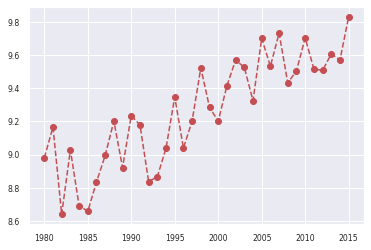

In [217]:
plt.plot(final_df.index, final_df.Temperature, 'ro--')
plt.show()

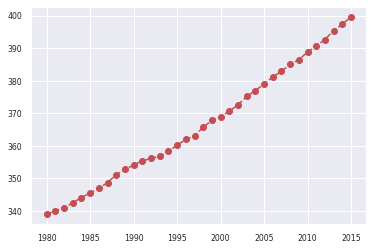

In [221]:
plt.plot(final_df.index, final_df.co2_concentration, 'ro--')
plt.show()

## Temperature Data + CO2 Concentration Data

In [223]:
temp_df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750
...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015


In [224]:
def fetch_month(date):
    return date.split('-')[1]

temp_df['month'] = temp_df['dt'].apply(fetch_month)
temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,01
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,02
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,03
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,04
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,05


In [235]:
temp_month_data = temp_df.rename(columns={'LandAverageTemperature': 'Temperature'})[['year', 'month', 'Temperature']]
temp_month_data

,year,month,Temperature
0,1750,01,3.034
1,1750,02,3.083
2,1750,03,5.626
3,1750,04,8.490
4,1750,05,11.573
...,...,...,...
3187,2015,08,14.755
3188,2015,09,12.999
3189,2015,10,10.801
3190,2015,11,7.433


In [236]:
temp_month_data['year'] = temp_month_data['year'].astype(int)
temp_month_data['month'] = temp_month_data['month'].astype(int)
temp_month_data

,year,month,Temperature
0,1750,1,3.034
1,1750,2,3.083
2,1750,3,5.626
3,1750,4,8.490
4,1750,5,11.573
...,...,...,...
3187,2015,8,14.755
3188,2015,9,12.999
3189,2015,10,10.801
3190,2015,11,7.433


In [ ]:
for i in range(len(temp_month_data)-1):
    if temp_month_data.iloc[i+1]['Month'] != temp_month_data.iloc[i]['Month'] + 1:
        

In [227]:
co2_df

,year,month,decimal,average,trend
0,1980,1,1980.042,338.55,337.93
1,1980,2,1980.125,339.27,338.22
2,1980,3,1980.208,339.60,338.25
3,1980,4,1980.292,340.00,338.37
4,1980,5,1980.375,340.43,338.90
...,...,...,...,...,...
493,2021,2,2021.125,415.30,413.93
494,2021,3,2021.208,415.63,414.00
495,2021,4,2021.292,415.93,414.14
496,2021,5,2021.375,416.22,414.59


In [241]:
def convert_to_decimal(year, month):
    if month == 1: return year + 0.042
    elif month == 2: return year + 0.125
    elif month == 3: return year + 0.208
    elif month == 4: return year + 0.292
    elif month == 5: return year + 0.375
    elif month == 6: return year + 0.458
    elif month == 7: return year + 0.542
    elif month == 8: return year + 0.625
    elif month == 9: return year + 0.708
    elif month == 10: return year + 0.792
    elif month == 11: return year + 0.875
    elif month == 12: return year + 0.958


In [249]:
temp_month_df = temp_month_data.groupby(['year', 'month']).sum()
temp_month_df

Temperature
year month             
1750 1            3.034
     2            3.083
     3            5.626
     4            8.490
     5           11.573
...                 ...
2015 8           14.755
     9           12.999
     10          10.801
     11           7.433
     12           5.518

[3192 rows x 1 columns]

In [251]:
co2_month_df = co2_df.groupby(['year', 'month']).sum()
co2_month_df

decimal  average   trend
year month                           
1980 1      1980.042   338.55  337.93
     2      1980.125   339.27  338.22
     3      1980.208   339.60  338.25
     4      1980.292   340.00  338.37
     5      1980.375   340.43  338.90
...              ...      ...     ...
2021 2      2021.125   415.30  413.93
     3      2021.208   415.63  414.00
     4      2021.292   415.93  414.14
     5      2021.375   416.22  414.59
     6      2021.458   415.48  414.86

[498 rows x 3 columns]

In [253]:
temp_co2_df = pd.merge(left=temp_month_df, right=co2_month_df, how='inner', on=['year', 'month'])
temp_co2_df

Temperature   decimal  average   trend
year month                                        
1980 1            2.956  1980.042   338.55  337.93
     2            3.652  1980.125   339.27  338.22
     3            5.367  1980.208   339.60  338.25
     4            8.935  1980.292   340.00  338.37
     5           11.770  1980.375   340.43  338.90
...                 ...       ...      ...     ...
2015 8           14.755  2015.625   397.07  399.85
     9           12.999  2015.708   397.34  400.14
     10          10.801  2015.792   398.80  400.37
     11           7.433  2015.875   400.36  400.68
     12           5.518  2015.958   401.66  401.18

[432 rows x 4 columns]

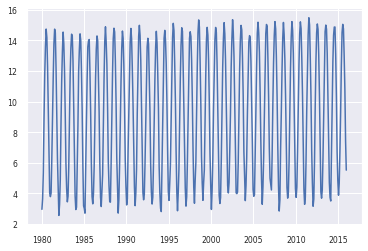

In [270]:
plt.plot(temp_co2_df.decimal, temp_co2_df.Temperature)


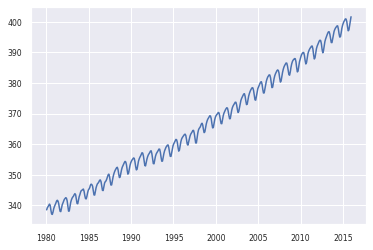

In [271]:
plt.plot(temp_co2_df.decimal, temp_co2_df.average)

In [280]:
new_co2_df = temp_co2_df.reset_index()
new_co2_df

,year,month,Temperature,decimal,average,trend
0,1980,1,2.956,1980.042,338.55,337.93
1,1980,2,3.652,1980.125,339.27,338.22
2,1980,3,5.367,1980.208,339.60,338.25
3,1980,4,8.935,1980.292,340.00,338.37
4,1980,5,11.770,1980.375,340.43,338.90
...,...,...,...,...,...,...
427,2015,8,14.755,2015.625,397.07,399.85
428,2015,9,12.999,2015.708,397.34,400.14
429,2015,10,10.801,2015.792,398.80,400.37
430,2015,11,7.433,2015.875,400.36,400.68


In [292]:
from datetime import datetime

def get_date(df):
    return str(int(df['year'])) + '-' + '0' + str(int(df['month'])) + '-01' if len(str(int(df['month']))) == 1 else str(int(df['year'])) + '-' + str(int(df['month'])) + '-01'

In [293]:
new_co2_df['date'] = new_co2_df.apply(get_date, axis=1)
new_co2_df

,year,month,Temperature,decimal,average,trend,date
0,1980,1,2.956,1980.042,338.55,337.93,1980-01-01
1,1980,2,3.652,1980.125,339.27,338.22,1980-02-01
2,1980,3,5.367,1980.208,339.60,338.25,1980-03-01
3,1980,4,8.935,1980.292,340.00,338.37,1980-04-01
4,1980,5,11.770,1980.375,340.43,338.90,1980-05-01
...,...,...,...,...,...,...,...
427,2015,8,14.755,2015.625,397.07,399.85,2015-08-01
428,2015,9,12.999,2015.708,397.34,400.14,2015-09-01
429,2015,10,10.801,2015.792,398.80,400.37,2015-10-01
430,2015,11,7.433,2015.875,400.36,400.68,2015-11-01


In [294]:
new_co2_df['date'] = pd.to_datetime(new_co2_df['date'])
new_co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   year         432 non-null    int64         
 1   month        432 non-null    int64         
 2   Temperature  432 non-null    float64       
 3   decimal      432 non-null    float64       
 4   average      432 non-null    float64       
 5   trend        432 non-null    float64       
 6   date         432 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 23.8 KB


In [295]:
new_co2_df

,year,month,Temperature,decimal,average,trend,date
0,1980,1,2.956,1980.042,338.55,337.93,1980-01-01
1,1980,2,3.652,1980.125,339.27,338.22,1980-02-01
2,1980,3,5.367,1980.208,339.60,338.25,1980-03-01
3,1980,4,8.935,1980.292,340.00,338.37,1980-04-01
4,1980,5,11.770,1980.375,340.43,338.90,1980-05-01
...,...,...,...,...,...,...,...
427,2015,8,14.755,2015.625,397.07,399.85,2015-08-01
428,2015,9,12.999,2015.708,397.34,400.14,2015-09-01
429,2015,10,10.801,2015.792,398.80,400.37,2015-10-01
430,2015,11,7.433,2015.875,400.36,400.68,2015-11-01


In [298]:
new_co2_df = new_co2_df.set_index('date')
new_co2_df

,year,month,Temperature,decimal,average,trend
date,,,,,,
1980-01-01,1980,1,2.956,1980.042,338.55,337.93
1980-02-01,1980,2,3.652,1980.125,339.27,338.22
1980-03-01,1980,3,5.367,1980.208,339.60,338.25
1980-04-01,1980,4,8.935,1980.292,340.00,338.37
1980-05-01,1980,5,11.770,1980.375,340.43,338.90
...,...,...,...,...,...,...
2015-08-01,2015,8,14.755,2015.625,397.07,399.85
2015-09-01,2015,9,12.999,2015.708,397.34,400.14
2015-10-01,2015,10,10.801,2015.792,398.80,400.37


In [310]:
new_temp_df_for_train = new_co2_df[['Temperature']]
new_co2_df_for_train = new_co2_df[['average']]

## ARIMA modeling

In [312]:

import statsmodels.api as sm
import warnings
import itertools
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

split_size = 360

temp_train = new_temp_df_for_train[:split_size]
temp_test = new_temp_df_for_train[split_size:]
co2_train = new_co2_df_for_train[:split_size]
co2_test = new_co2_df_for_train[split_size:]
temp_test_final = temp_test.copy()
co2_test_final = co2_test.copy()

<Figure size 1152x576 with 0 Axes>

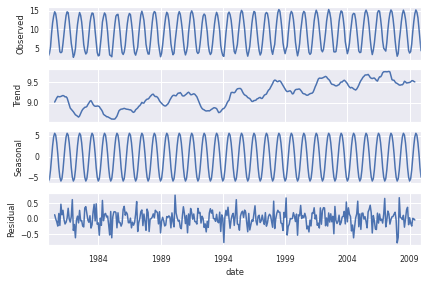

In [314]:
plt.figure(figsize=(16, 8))
decomposition = sm.tsa.seasonal_decompose(temp_train, model='additive')
fig = decomposition.plot()
plt.show()

<Figure size 1152x576 with 0 Axes>

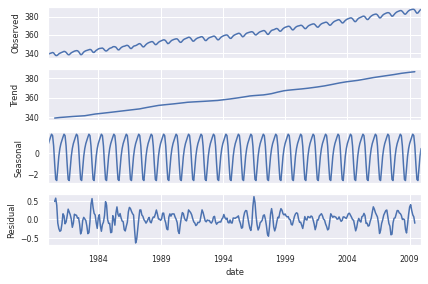

In [518]:
plt.figure(figsize=(16, 8))
decomposition = sm.tsa.seasonal_decompose(co2_train, model='additive')
fig = decomposition.plot()
plt.show()

In [317]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 7.5 MB/s 
     |████████████████████████████████| 9.5 MB 31.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [368]:
from pmdarima import auto_arima
stepwise_model = auto_arima(temp_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=5.33 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=550.284, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=338.747, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=461.379, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=303.260, Time=1.35 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.78 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.73 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=413.029, Time=0.68 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=290.115, Time=1.67 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=326.401, Time=0.65 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=6.20 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.30 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=278.137, Time=1.70 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=311.997, Time=

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  # - Attemtping to index with a type that cannot be cast to integer


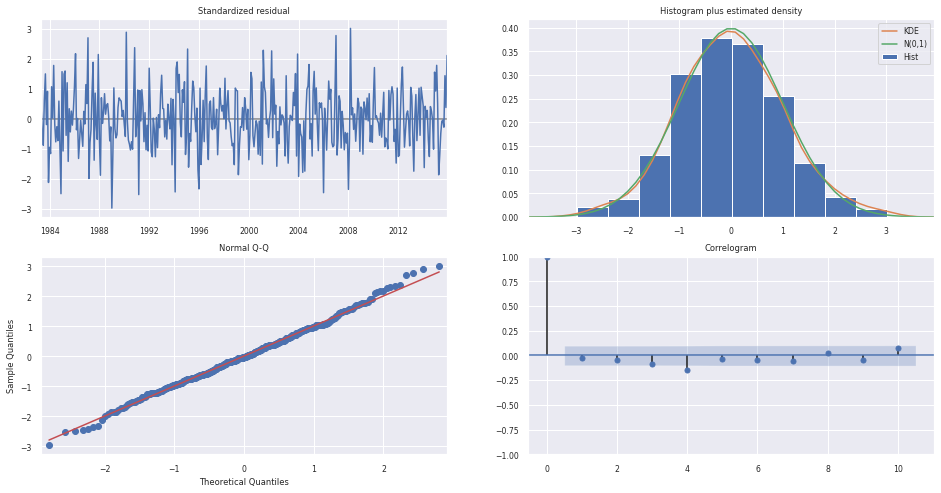

In [369]:
SARIMAMonth = sm.tsa.statespace.SARIMAX(new_temp_df_for_train, order=(3, 1, 0), seasonal_order=(2, 1, 0, 12) ,enforce_stationarity=False,enforce_invertibility=False)

SARIMA_results_month = SARIMAMonth.fit()

SARIMA_results_month.plot_diagnostics(figsize=(16, 8))
plt.show()

0.25218389993373364


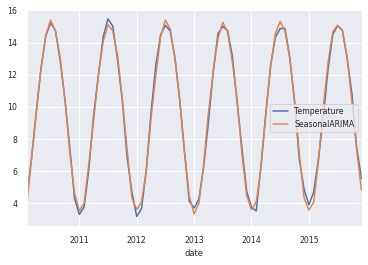

In [370]:
SARIMA_predict_month_1 = SARIMA_results_month.predict(start=0,end=600)

# 결과 비교를 위해 기존에 마련해둔 test데이터에 결과를 붙임
temp_test_final['SeasonalARIMA'] = SARIMA_predict_month_1

# RMSE를 살펴 봄
RMSE_Month_Seasonal_ARIMA  = np.mean(np.sqrt((temp_test_final['SeasonalARIMA'] - temp_test_final['Temperature']) ** 2)) 
print(RMSE_Month_Seasonal_ARIMA)

# test 데이터와 예측 결과치를 비교
temp_test_final[1:].plot()

In [371]:
SARIMA_predict_month_1

1980-01-01     0.000000
1980-02-01     2.312387
1980-03-01     3.330331
1980-04-01     4.751705
1980-05-01     7.813061
                ...    
2029-09-01    17.144028
2029-10-01    14.638011
2029-11-01    11.261199
2029-12-01     9.245291
2030-01-01     8.104587
Freq: MS, Length: 601, dtype: float64

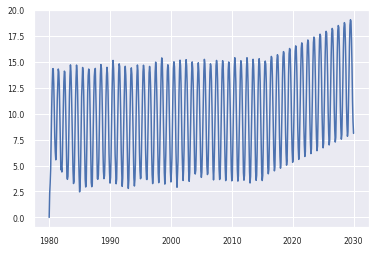

In [372]:
plt.plot(SARIMA_predict_month_1)

In [373]:
from pmdarima import auto_arima
stepwise_model = auto_arima(co2_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-467.756, Time=3.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-105.176, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-271.423, Time=0.67 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-469.754, Time=2.63 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-283.418, Time=0.40 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-469.962, Time=2.64 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-381.730, Time=0.69 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-468.265, Time=5.83 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=9.44 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-470.107, Time=5.74 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-298.045, Time=2.78 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-468.109, Time=7.40 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=-468.109, Time=7.33 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=-368.058, Time=4.90 sec
 ARIMA(1,1,2)(0,1,2)[12]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  # - Attemtping to index with a type that cannot be cast to integer


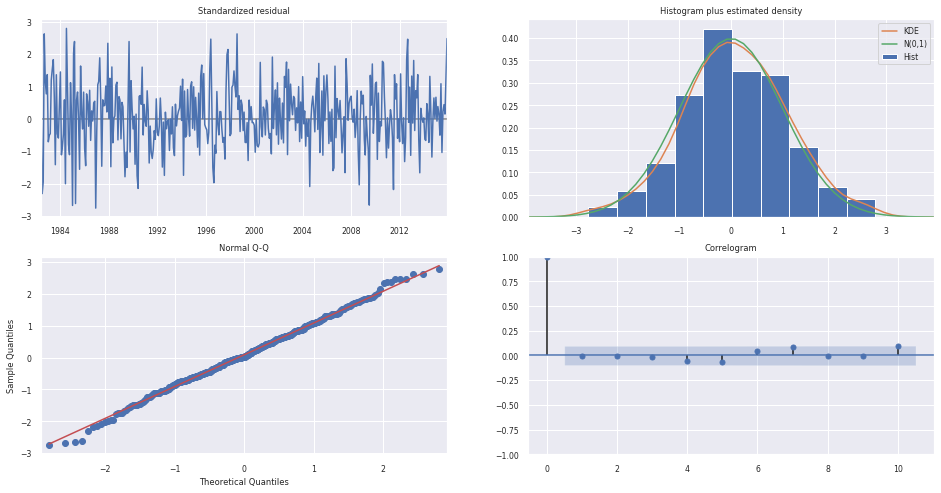

In [374]:
SARIMAMonth = sm.tsa.statespace.SARIMAX(new_co2_df_for_train, order=(0, 1, 3), seasonal_order=(0, 1, 1, 12) ,enforce_stationarity=False,enforce_invertibility=False)

SARIMA_results_month = SARIMAMonth.fit()

SARIMA_results_month.plot_diagnostics(figsize=(16, 8))
plt.show()

RMSE: 0.0852792963641949



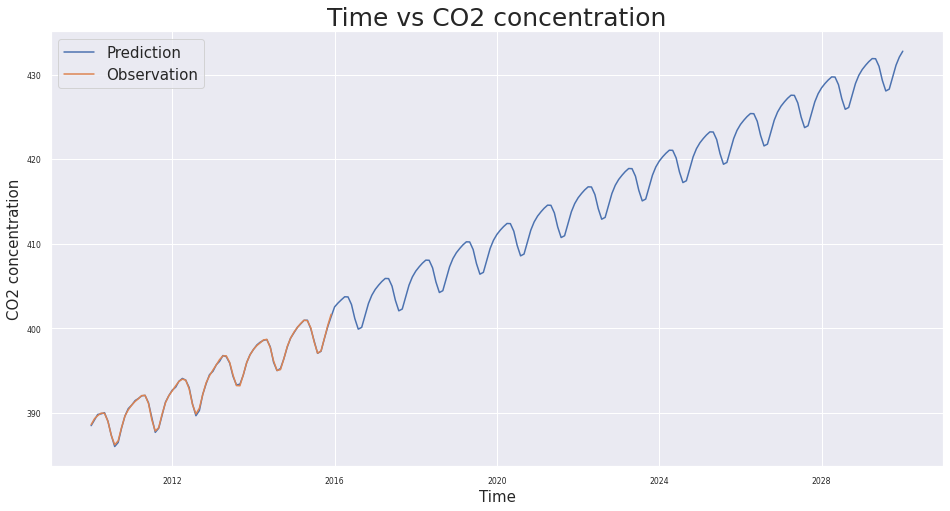

In [411]:
SARIMA_predict_month_1 = SARIMA_results_month.predict(start=split_size,end=split_size + 240)

# 결과 비교를 위해 기존에 마련해둔 test데이터에 결과를 붙임
co2_test_final['SeasonalARIMA'] = SARIMA_predict_month_1


# RMSE를 살펴 봄
RMSE_Month_Seasonal_ARIMA  = np.mean(np.sqrt((co2_test_final['SeasonalARIMA'] - co2_test_final['average']) ** 2)) 
print(f"RMSE: {RMSE_Month_Seasonal_ARIMA}\n")

# test 데이터와 예측 결과치를 비교
# co2_test_final[1:].plot(figsize=(16, 8), fontsize=10)
plt.figure(figsize=(16, 8))
plt.plot(SARIMA_predict_month_1.index, SARIMA_predict_month_1.values, label='Prediction')
plt.plot(co2_test_final.index, co2_test_final.average, label='Observation')
plt.title('Time vs CO2 concentration', fontsize=25)
plt.xlabel('Time', fontsize=15)
plt.ylabel('CO2 concentration', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [480]:
co2_concentration_pred = SARIMA_results_month.predict(start=split_size,end=split_size + 2400)
co2_concentration_pred

2010-01-01    388.496839
2010-02-01    389.201071
2010-03-01    389.822744
2010-04-01    389.889546
2010-05-01    390.029908
                 ...    
2209-09-01    818.101290
2209-10-01    819.497530
2209-11-01    820.929854
2209-12-01    821.894953
2210-01-01    822.588275
Freq: MS, Length: 2401, dtype: float64

In [481]:
SARIMA_predict_month_1

2010-01-01    388.496839
2010-02-01    389.201071
2010-03-01    389.822744
2010-04-01    389.889546
2010-05-01    390.029908
                 ...    
2029-09-01    428.270519
2029-10-01    429.666759
2029-11-01    431.099083
2029-12-01    432.064182
2030-01-01    432.757504
Freq: MS, Length: 241, dtype: float64

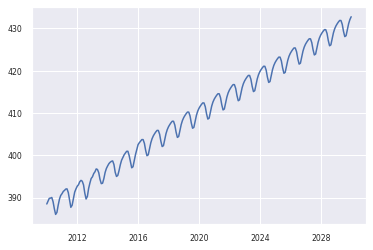

In [482]:
plt.plot(SARIMA_predict_month_1)

In [351]:
new_co2_df

,year,month,Temperature,decimal,average,trend
date,,,,,,
1980-01-01,1980,1,2.956,1980.042,338.55,337.93
1980-02-01,1980,2,3.652,1980.125,339.27,338.22
1980-03-01,1980,3,5.367,1980.208,339.60,338.25
1980-04-01,1980,4,8.935,1980.292,340.00,338.37
1980-05-01,1980,5,11.770,1980.375,340.43,338.90
...,...,...,...,...,...,...
2015-08-01,2015,8,14.755,2015.625,397.07,399.85
2015-09-01,2015,9,12.999,2015.708,397.34,400.14
2015-10-01,2015,10,10.801,2015.792,398.80,400.37


In [352]:
final_df

,Temperature,co2_concentration,all_co2_emission,log_all_co2_emission,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,all_disasters,Flood,Extreme weather,Earthquake,Extreme temperature,Drought,Landslide,Wildfire,Mass movement (dry),Volcanic activity
Year,,,,,,,,,,,,,,,,,,,,
1980,8.980333,338.910833,76563.972,11.245882,28059.868,1677.528,1191.343,10819.085,34816.149,0.000,133.0,39.0,42.0,24.0,3.0,14.0,4.0,4.0,1.0,2.0
1981,9.165833,340.105000,74416.512,11.217433,27680.830,1666.917,900.075,11020.051,33150.405,0.000,138.0,43.0,50.0,17.0,2.0,13.0,8.0,4.0,0.0,1.0
1982,8.639167,340.856667,73934.376,11.210933,28104.124,1652.613,899.746,10864.161,32415.447,0.000,153.0,48.0,52.0,18.0,3.0,13.0,11.0,3.0,2.0,3.0
1983,9.028167,342.530833,74520.783,11.218833,28773.774,1683.802,809.745,11139.445,32114.104,0.000,205.0,49.0,59.0,25.0,2.0,32.0,15.0,12.0,4.0,7.0
1984,8.691833,344.075833,76401.405,11.243756,29779.564,1698.853,696.211,12024.942,32201.834,0.000,146.0,47.0,57.0,13.0,1.0,8.0,6.0,7.0,0.0,7.0
1985,8.658000,345.544167,79237.478,11.280205,32037.060,1699.137,673.850,12618.784,32208.990,0.000,165.0,58.0,51.0,22.0,8.0,3.0,6.0,13.0,2.0,2.0
1986,8.833583,346.963333,80157.450,11.291748,32355.870,1757.714,623.047,12363.755,33057.080,0.000,150.0,50.0,56.0,21.0,2.0,4.0,9.0,6.0,0.0,2.0
1987,8.994417,348.674167,82140.353,11.316185,33316.924,1821.387,600.962,13435.601,32965.485,0.000,191.0,68.0,58.0,19.0,6.0,15.0,13.0,8.0,2.0,2.0
1988,9.201583,351.158333,84903.872,11.349275,34210.154,1919.897,697.290,14077.429,33999.118,0.000,200.0,76.0,60.0,18.0,6.0,17.0,15.0,0.0,3.0,5.0


## CO2 concentration VS Temperature

In [357]:
# combine temp_data, co2_concentration_data, co2_emission_data, disasters_data
co2_vs_temp_df = pd.merge(left=temp_data, right=co2_concentration_data, how='inner', on='Year')
co2_vs_temp_df

,Year,Temperature,co2_concentration
0,1980,8.980333,338.910833
1,1981,9.165833,340.105000
2,1982,8.639167,340.856667
3,1983,9.028167,342.530833
4,1984,8.691833,344.075833
5,1985,8.658000,345.544167
6,1986,8.833583,346.963333
7,1987,8.994417,348.674167
8,1988,9.201583,351.158333
9,1989,8.922000,352.782500


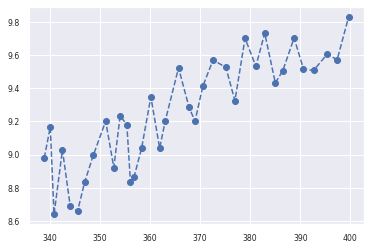

In [520]:
X = co2_vs_temp_df['co2_concentration']
y = co2_vs_temp_df['Temperature']
plt.plot(X, y, 'o--')
plt.show()

In [521]:
from sklearn.linear_model import LinearRegression

co2_concentration_temp_fitter = LinearRegression()
co2_concentration_temp_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [522]:
co2_concentration_temp_fitter.predict([[500]])

array([11.31116994])

In [523]:
co2_concentration_temp_fitter.coef_

array([0.01536912])

In [524]:
co2_concentration_temp_fitter.intercept_

3.6266122836780506

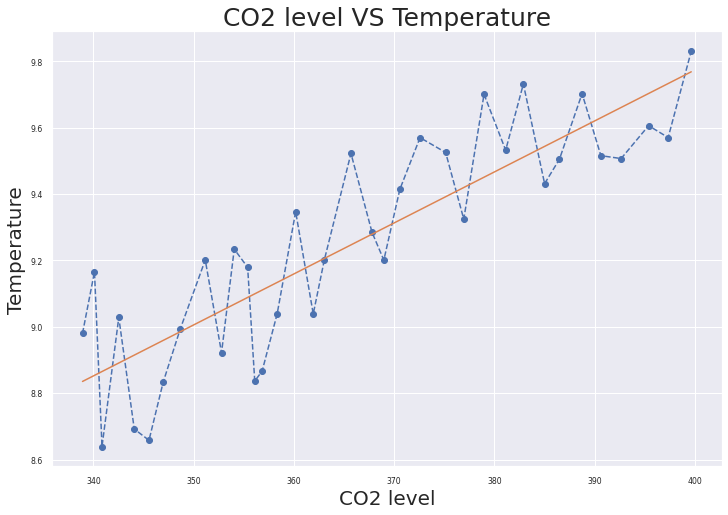

In [525]:
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o--')
plt.plot(X, co2_concentration_temp_fitter.predict(X.values.reshape(-1, 1)))

plt.title('CO2 level VS Temperature', fontsize=25)
plt.xlabel('CO2 level', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.show()

## CO2 Emission VS CO2 Concentration

In [381]:
# combine temp_data, co2_concentration_data, co2_emission_data, disasters_data
co2_emit_conc_df = pd.merge(left=co2_emission_data, right=co2_concentration_data, how='inner', on='Year')
co2_emit_conc_df

,Year,all_co2_emission,log_all_co2_emission,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_concentration
0,1980,76563.972,11.245882,28059.868,1677.528,1191.343,10819.085,34816.149,0.000,338.910833
1,1981,74416.512,11.217433,27680.830,1666.917,900.075,11020.051,33150.405,0.000,340.105000
2,1982,73934.376,11.210933,28104.124,1652.613,899.746,10864.161,32415.447,0.000,340.856667
3,1983,74520.783,11.218833,28773.774,1683.802,809.745,11139.445,32114.104,0.000,342.530833
4,1984,76401.405,11.243756,29779.564,1698.853,696.211,12024.942,32201.834,0.000,344.075833
5,1985,79237.478,11.280205,32037.060,1699.137,673.850,12618.784,32208.990,0.000,345.544167
6,1986,80157.450,11.291748,32355.870,1757.714,623.047,12363.755,33057.080,0.000,346.963333
7,1987,82140.353,11.316185,33316.924,1821.387,600.962,13435.601,32965.485,0.000,348.674167
8,1988,84903.872,11.349275,34210.154,1919.897,697.290,14077.429,33999.118,0.000,351.158333
9,1989,86013.824,11.362263,34132.685,1966.190,582.613,14805.146,34527.193,0.000,352.782500


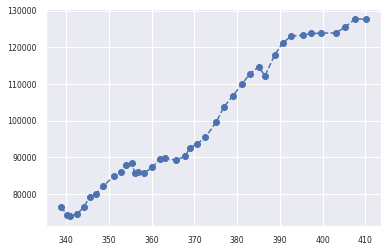

In [526]:
X = co2_emit_conc_df['co2_concentration']
y = co2_emit_conc_df['all_co2_emission']
plt.plot(X, y, 'o--')
plt.show()

In [527]:
from sklearn.linear_model import LinearRegression

co2_emit_conc_fitter = LinearRegression()
co2_emit_conc_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [528]:
co2_emit_conc_fitter.coef_

array([836.16936985])

In [529]:
co2_emit_conc_fitter.intercept_

-211091.80545563658

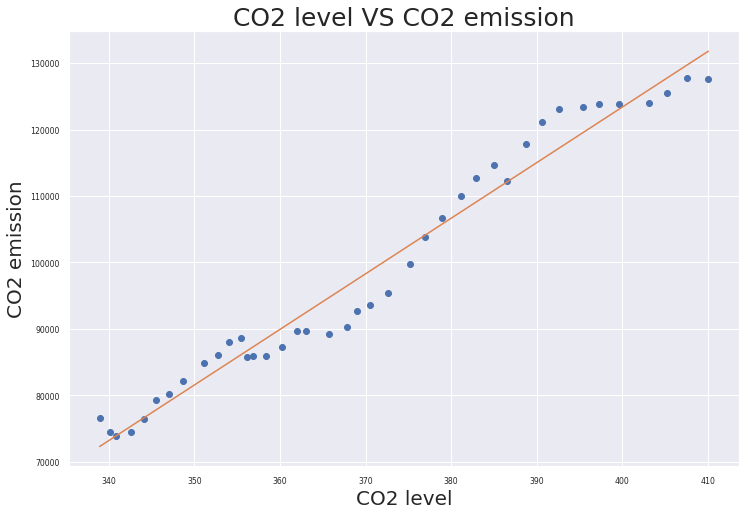

In [532]:
plt.figure(figsize=(12,8))
plt.plot(X, y, 'o')
plt.plot(X, co2_emit_conc_fitter.predict(X.values.reshape(-1, 1)))
plt.title('CO2 level VS CO2 emission', fontsize=25)
plt.xlabel('CO2 level', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.show()

## Prediction - 언제 지구 온도가 5도 올라갈까

In [483]:
co2_concentration_pred

2010-01-01    388.496839
2010-02-01    389.201071
2010-03-01    389.822744
2010-04-01    389.889546
2010-05-01    390.029908
                 ...    
2209-09-01    818.101290
2209-10-01    819.497530
2209-11-01    820.929854
2209-12-01    821.894953
2210-01-01    822.588275
Freq: MS, Length: 2401, dtype: float64

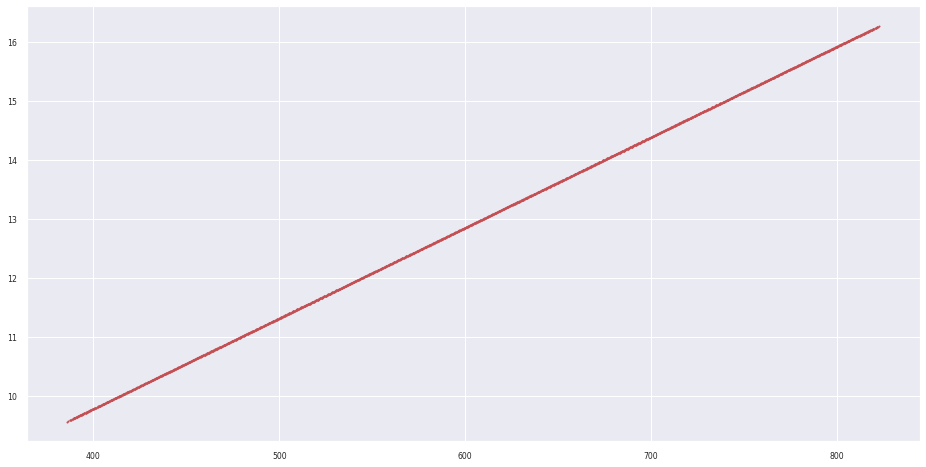

In [484]:
pred_X = co2_concentration_pred.values

plt.figure(figsize=(16, 8))
plt.plot(pred_X, co2_concentration_temp_fitter.predict(pred_X.reshape(-1, 1)), 'ro', markersize=1)
plt.show()

In [485]:
co2_vs_temp_df.tail()

,Year,Temperature,co2_concentration
31,2011,9.516000,390.634167
32,2012,9.507333,392.652500
33,2013,9.606500,395.395000
34,2014,9.570667,397.345833
35,2015,9.831000,399.648333


In [486]:
co2_emit_conc_df.tail()

,Year,all_co2_emission,log_all_co2_emission,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_concentration
35,2015,123857.872,11.726890,49217.577,4815.970,1338.264,26193.854,41795.801,496.412,399.648333
36,2016,123937.780,11.727535,48325.019,4930.264,1389.308,26911.855,41906.729,474.598,403.088333
37,2017,125484.864,11.739940,48393.214,4972.869,1519.793,27598.832,42518.788,481.366,405.219167
38,2018,127794.922,11.758182,49098.274,5089.716,1608.089,28867.103,42640.879,490.869,407.617500
39,2019,127617.538,11.756793,48054.260,5232.594,1608.089,29273.644,42958.078,490.869,410.072500


In [487]:
co2_concentration_temp_fitter.predict([[400]])

array([9.77425841])

In [501]:
co2_pred_df = pd.DataFrame(co2_concentration_pred, columns=['predicted_co2_concentration'])
co2_pred_df.reset_index(inplace=True)
co2_pred_df.head()

,index,predicted_co2_concentration
0,2010-01-01,388.496839
1,2010-02-01,389.201071
2,2010-03-01,389.822744
3,2010-04-01,389.889546
4,2010-05-01,390.029908


In [502]:
co2_pred_df['year'] = co2_pred_df['index'].apply(lambda x: str(x).split('-')[0])
co2_pred_df.head()

,index,predicted_co2_concentration,year
0,2010-01-01,388.496839,2010
1,2010-02-01,389.201071,2010
2,2010-03-01,389.822744,2010
3,2010-04-01,389.889546,2010
4,2010-05-01,390.029908,2010


In [503]:
co2_pred_df = co2_pred_df.groupby('year').mean()
co2_pred_df

,predicted_co2_concentration
year,
2010,388.723693
2011,390.644730
2012,392.633345
2013,395.362295
2014,397.350297
...,...
2206,813.867025
2207,816.032752
2208,818.198478


In [504]:
cur_temp = co2_concentration_temp_fitter.predict([[co2_pred_df.loc['2021']['predicted_co2_concentration']]])
cur_temp = cur_temp.item()
print(f"2021년 예상 지구 평균 표면 온도: {cur_temp:.4f}도")

2021년 예상 지구 평균 표면 온도: 9.9772도


In [507]:
tmp_co2_concentration = co2_pred_df.loc['2021']['predicted_co2_concentration']
while True:
    tmp_pred_temp = co2_concentration_temp_fitter.predict([[tmp_co2_concentration]])
    tmp_pred_temp = tmp_pred_temp.item()
    if tmp_pred_temp >= cur_temp + 5:
        break
    tmp_co2_concentration += 1

print(f"Target Temperature is: {tmp_pred_temp:.4f}")
print(f"Target CO2 Concentration is: {tmp_co2_concentration:.4f}")

Target Temperature is: 14.9876
Target CO2 Concentration is: 739.2076


In [508]:
for i in co2_pred_df.index:
    if co2_pred_df.loc[i]['predicted_co2_concentration'] >= tmp_co2_concentration:
        print(f"Target에 도달하는 연도는 {i}년입니다.")
        break

Target에 도달하는 연도는 2172년입니다.
